### Assignment 5

#### Shameeksha Mendon 100393010 
#### Sibylle Avelena 100379767


Objectives:

(1) Compare the effects of pain relief drugs

(2) Side-effect of those give drugs.

#### Given information:
Outcome for Objective 1: pain score and dose of drugs used (from PCA)

Group 1
Bolus dose: fentanyl 10μg/ml (Group F, n = 35) 

Group2
Bolus dose: fentanyl 10μg/ml with nefopam 1,2mg/ml
Note: mg/ml to mcg/ml = *1000

The structure of the surgery:
- Presurgery
1. Patient is given analgesic (fentanyl, propofol, and esmeron)

- Postsurgery
1. Patient is given background dose before PCA
2. Patient is given bolus dose based on PCA the drugs used differ in each groups.


When postoperative VAS ≥ 4, 
titration in 48 hours with a background of continuous infusion rate of 0.25μg/kg/h; 

bolus dose amount set at 0.5ml, 

lockout interval set at 15 minute; 

Thus for patient with weight 60kg, the rate of infusion is:
60*0.25 = 15 mcg/hour 

Maximum dose amount 15ml/4 hours or 0.375ml/hour.

#### Flowchart of the study:
To understand the construct of the study, it is helpful to look at the flowchart.

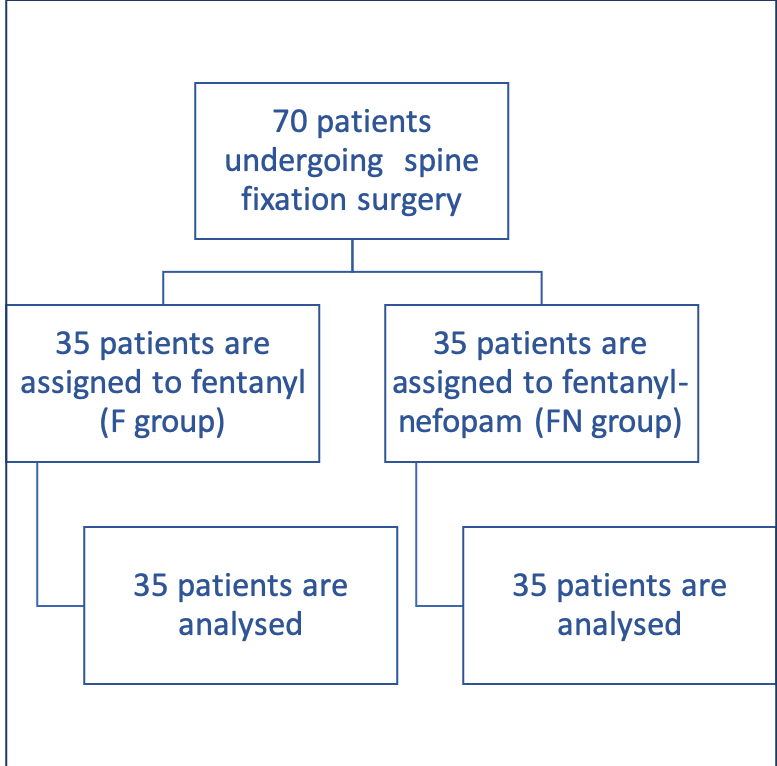

In [1]:
from IPython.display import Image

with open("Flowchart Assignment 5.png", "rb") as f:
    display(Image(data=f.read(), format='png'))

#### Import libraries necessary for analyses:

In [2]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('Data.csv')
data

,nhom,ten,tuoi,gioi,cao,nang,bmi,apfel,benhkemtheo,asa,loaiphauthuat,thoigianphauthuat,fentanyl,propofol,esmeron,lieuchuando,solanchuando,solanbolus,solanbammay,lieufentanyl,lieunefopam,solanchongnon,buonon,non,khomieng,chongmat,run,ngua,vamohoi,daudau,trongnguc,muchailong,vastruocmo,vas0,vas1,vas2,vas3,vas6,vas9,vas12,vas24,vas36,vas48,vasdtruocmo,vasd0,vasd1,vasd2,vasd3,vasd6,vasd9,vasd12,vasd24,vasd36,vasd48,machtruocmo,mach0,mach1,mach2,mach3,mach6,mach9,mach12,mach24,mach36,mach48,hatruocmo,ha0,ha1,ha2,ha3,ha6,ha9,ha12,ha24,ha36,ha48,thotruocmo,tho0,tho1,tho2,tho3,tho6,tho9,tho12,tho24,tho36,tho48,sptruocmo,sp0,sp1,sp2,sp3,sp6,sp9,sp12,sp24,sp36,sp48,ramtruocmo,ram0,ram1,ram2,ram3,ram6,ram9,ram12,ram24,ram36,ram48,VAR00001,filter_$
0,1,tuyet,41,2,160,67,26.170,3,NaN,1,2,120,250,100,50,150,3,12,18,780.0,20.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.0,4.0,4,3,3,1,1,1,1,1,1,6,6,5,4,4,4,3,2,2,2,2,87,92,87,86,80,84,88,80,68,72,74,95.333333,90.000000,91.670000,95.670000,93.330000,91.330000,87.670000,71.670000,81.670000,69.330000,95.333333,18,16,16,16,18,18,18,18,18,18,18,100,100,99,98,99,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,0
1,2,long,49,2,157,55,22.310,3,NaN,1,2,100,400,100,50,50,1,8,8,712.0,105.44,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4,4.0,4.0,3,2,3,4,3,3,4,3,2,5,6,6,4,4,5,4,4,5,5,3,85,92,87,82,100,102,100,107,100,102,99,100.000000,109.000000,85.666667,89.000000,114.666667,115.666667,106.666667,115.000000,114.000000,112.333333,101.333333,17,16,16,16,18,18,18,16,18,18,18,97,98,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
2,2,huynh,60,1,160,58,22.656,1,NaN,2,2,100,400,100,30,100,2,12,18,780.0,113.60,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,4,5.0,4.0,3,2,3,2,2,1,2,2,2,7,5,5,4,4,4,3,3,3,4,3,82,80,82,81,80,78,72,74,77,75,76,94.000000,94.000000,83.333333,79.000000,86.666667,91.333333,94.000000,85.000000,75.333333,80.000000,85.000000,18,18,18,18,18,18,18,18,18,18,18,97,99,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
3,2,toan,67,2,150,56,24.880,3,NaN,1,2,140,300,80,50,100,2,4,5,744.0,94.88,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,1.0,4.0,3,3,3,3,2,2,2,1,1,3,5,4,4,4,4,3,3,3,2,2,80,83,80,88,92,88,80,90,85,84,75,94.666667,93.333333,90.000000,105.000000,102.000000,99.000000,93.333333,101.333333,105.000000,103.333333,96.666667,18,18,18,18,18,18,18,18,18,18,18,97,97,97,97,97,97,97,97,97,97,97,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
4,2,hien,59,2,153,48,20.500,3,1.0,2,2,150,400,60,50,150,3,12,18,636.0,96.32,2.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,3,4.0,4.0,4,4,3,3,2,2,3,2,2,6,8,5,5,4,4,3,3,4,4,4,76,92,82,96,92,82,84,80,76,72,78,106.666667,99.666667,96.333333,106.666667,100.000000,96.333333,88.333333,94.000000,93.000000,90.666667,94.000000,18,18,18,16,18,16,16,14,16,18,16,98,98,98,99,99,99,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2,cup,67,2,155,55,22.890,3,NaN,1,1,300,300,70,70,200,4,2,4,762.0,96.20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6.0,5.0,3,3,3,3,3,3,3,3,2,8,5,4,4,4,4,4,4,4,4,3,74,70,78,76,78,82,80,80,80,76,76,96.666667,83.333333,99.000000,92.000000,91.333333,92.000000,90.666667,91.333333,90.666667,90.333333,95.333333,18,18,18,18,18,18,18,18,18,18,18,97,97,97,97,97,97,97,97,97,97,97,2,3,2,2,2.0,2,2,2,1,1,1,NaN,1
66,2,tuan,39,1,162,58,22.100,2,0.0,1,2,100,250,110,50,150,3,0,0,562.0,89.80,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3.0,5.0,2,2,2,2,2,2,1,1,1,4,5,3,3,3,3,3,3,2,2,2,75,72,70,75,77,80,77,80,80,76,74,95.000000,88.666667,86.666667,93.333333,87.666667,92.000000,91.666667,93.333333,95.000000,88.333333,88.333333,16,16,16,16,

In [4]:
data.shape

(70, 111)

#### Notes:
From prior research, we know that the general starting dose for fentanyl is from 25-50mcg. Therefore, we can say that the current units of fentanyl, is most likely ng. Thus, I will convert it to mcg make it easier for analysis. 

In [5]:
data.fentanyl = (data.fentanyl/10)

data.lieuchuando = (data.lieuchuando/10)
data.head(3)

,nhom,ten,tuoi,gioi,cao,nang,bmi,apfel,benhkemtheo,asa,loaiphauthuat,thoigianphauthuat,fentanyl,propofol,esmeron,lieuchuando,solanchuando,solanbolus,solanbammay,lieufentanyl,lieunefopam,solanchongnon,buonon,non,khomieng,chongmat,run,ngua,vamohoi,daudau,trongnguc,muchailong,vastruocmo,vas0,vas1,vas2,vas3,vas6,vas9,vas12,vas24,vas36,vas48,vasdtruocmo,vasd0,vasd1,vasd2,vasd3,vasd6,vasd9,vasd12,vasd24,vasd36,vasd48,machtruocmo,mach0,mach1,mach2,mach3,mach6,mach9,mach12,mach24,mach36,mach48,hatruocmo,ha0,ha1,ha2,ha3,ha6,ha9,ha12,ha24,ha36,ha48,thotruocmo,tho0,tho1,tho2,tho3,tho6,tho9,tho12,tho24,tho36,tho48,sptruocmo,sp0,sp1,sp2,sp3,sp6,sp9,sp12,sp24,sp36,sp48,ramtruocmo,ram0,ram1,ram2,ram3,ram6,ram9,ram12,ram24,ram36,ram48,VAR00001,filter_$
0,1,tuyet,41,2,160,67,26.170,3,NaN,1,2,120,25.0,100,50,15.0,3,12,18,780.0,20.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.0,4.0,4,3,3,1,1,1,1,1,1,6,6,5,4,4,4,3,2,2,2,2,87,92,87,86,80,84,88,80,68,72,74,95.333333,90.0,91.670000,95.67,93.330000,91.330000,87.670000,71.67,81.670000,69.330000,95.333333,18,16,16,16,18,18,18,18,18,18,18,100,100,99,98,99,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,0
1,2,long,49,2,157,55,22.310,3,NaN,1,2,100,40.0,100,50,5.0,1,8,8,712.0,105.44,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4,4.0,4.0,3,2,3,4,3,3,4,3,2,5,6,6,4,4,5,4,4,5,5,3,85,92,87,82,100,102,100,107,100,102,99,100.000000,109.0,85.666667,89.00,114.666667,115.666667,106.666667,115.00,114.000000,112.333333,101.333333,17,16,16,16,18,18,18,16,18,18,18,97,98,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
2,2,huynh,60,1,160,58,22.656,1,NaN,2,2,100,40.0,100,30,10.0,2,12,18,780.0,113.60,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,4,5.0,4.0,3,2,3,2,2,1,2,2,2,7,5,5,4,4,4,3,3,3,4,3,82,80,82,81,80,78,72,74,77,75,76,94.000000,94.0,83.333333,79.00,86.666667,91.333333,94.000000,85.00,75.333333,80.000000,85.000000,18,18,18,18,18,18,18,18,18,18,18,97,99,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1


I decided to rename the columns for easier analyses. 

In [6]:
data.rename(columns = {'nhom':'group','ten': 'name','tuoi': 'age','gioi': 'gender', 'cao': 'height','nang':'weight','benhkemtheo':'comorbidity','asa': 'ASA','loaiphauthuat': 'surgery_type','thoigianphauthuat':'surgery_length','lieuchuando':'background_dose','solanchuando':'number_of_background_dose','solanbolus':'bolus_dose','solanbammay':'PCA_pump_count','lieufentanyl':'postsurgery_fentanyl','lieunefopam':'postsurgery_nefopam','solanchongnon':'freq_antiemetics','buonon':'nausea','non':'vomit','khomieng':'dry_mouth','chongmat':'dizzy','run':'quiver','ngua':'itchy','vamohoi':'sweat','daudau':'headache','trongnguc':'palpitations','muchailong':'patient_satisfaction','vastruocmo':'VAS_preoperation','vasdtruocmo':'VAS','machtruocmo':'presurgery_pulse','hatruocmo':'presurgery_pressure','thotruocmo':'respiratory_rate','sptruocmo':'pulse_oximetry','ramtruocmo':'presurgery_ram'}, inplace= True)
data.head(10)

,group,name,age,gender,height,weight,bmi,apfel,comorbidity,ASA,surgery_type,surgery_length,fentanyl,propofol,esmeron,background_dose,number_of_background_dose,bolus_dose,PCA_pump_count,postsurgery_fentanyl,postsurgery_nefopam,freq_antiemetics,nausea,vomit,dry_mouth,dizzy,quiver,itchy,sweat,headache,palpitations,patient_satisfaction,VAS_preoperation,vas0,vas1,vas2,vas3,vas6,vas9,vas12,vas24,vas36,vas48,VAS,vasd0,vasd1,vasd2,vasd3,vasd6,vasd9,vasd12,vasd24,vasd36,vasd48,presurgery_pulse,mach0,mach1,mach2,mach3,mach6,mach9,mach12,mach24,mach36,mach48,presurgery_pressure,ha0,ha1,ha2,ha3,ha6,ha9,ha12,ha24,ha36,ha48,respiratory_rate,tho0,tho1,tho2,tho3,tho6,tho9,tho12,tho24,tho36,tho48,pulse_oximetry,sp0,sp1,sp2,sp3,sp6,sp9,sp12,sp24,sp36,sp48,presurgery_ram,ram0,ram1,ram2,ram3,ram6,ram9,ram12,ram24,ram36,ram48,VAR00001,filter_$
0,1,tuyet,41,2,160,67,26.170,3,NaN,1,2,120,25.0,100,50,15.0,3,12,18,780.0,20.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.0,4.0,4,3,3,1,1,1,1,1,1,6,6,5,4,4,4,3,2,2,2,2,87,92,87,86,80,84,88,80,68,72,74,95.333333,90.000000,91.670000,95.670000,93.330000,91.330000,87.670000,71.670000,81.670000,69.330000,95.333333,18,16,16,16,18,18,18,18,18,18,18,100,100,99,98,99,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,0
1,2,long,49,2,157,55,22.310,3,NaN,1,2,100,40.0,100,50,5.0,1,8,8,712.0,105.44,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4,4.0,4.0,3,2,3,4,3,3,4,3,2,5,6,6,4,4,5,4,4,5,5,3,85,92,87,82,100,102,100,107,100,102,99,100.000000,109.000000,85.666667,89.000000,114.666667,115.666667,106.666667,115.000000,114.000000,112.333333,101.333333,17,16,16,16,18,18,18,16,18,18,18,97,98,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
2,2,huynh,60,1,160,58,22.656,1,NaN,2,2,100,40.0,100,30,10.0,2,12,18,780.0,113.60,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,4,5.0,4.0,3,2,3,2,2,1,2,2,2,7,5,5,4,4,4,3,3,3,4,3,82,80,82,81,80,78,72,74,77,75,76,94.000000,94.000000,83.333333,79.000000,86.666667,91.333333,94.000000,85.000000,75.333333,80.000000,85.000000,18,18,18,18,18,18,18,18,18,18,18,97,99,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
3,2,toan,67,2,150,56,24.880,3,NaN,1,2,140,30.0,80,50,10.0,2,4,5,744.0,94.88,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,1.0,4.0,3,3,3,3,2,2,2,1,1,3,5,4,4,4,4,3,3,3,2,2,80,83,80,88,92,88,80,90,85,84,75,94.666667,93.333333,90.000000,105.000000,102.000000,99.000000,93.333333,101.333333,105.000000,103.333333,96.666667,18,18,18,18,18,18,18,18,18,18,18,97,97,97,97,97,97,97,97,97,97,97,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
4,2,hien,59,2,153,48,20.500,3,1.0,2,2,150,40.0,60,50,15.0,3,12,18,636.0,96.32,2.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,3,4.0,4.0,4,4,3,3,2,2,3,2,2,6,8,5,5,4,4,3,3,4,4,4,76,92,82,96,92,82,84,80,76,72,78,106.666667,99.666667,96.333333,106.666667,100.000000,96.333333,88.333333,94.000000,93.000000,90.666667,94.000000,18,18,18,16,18,16,16,14,16,18,16,98,98,98,99,99,99,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
5,2,hoi,45,1,165,60,22.030,2,NaN,1,2,120,40.0,120,50,5.0,1,10,20,848.0,118.16,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4.0,4.0,2,2,2,2,2,2,2,2,2,4,5,4,4,4,3,3,3,3,3,3,87,90,87,80,76,72,74,70,72,71,73,94.000000,100.000000,93.000000,94.000000,95.666667,89.333333,86.666667,87.333333,88.000000,93.000000,79.666667,16,18,18,18,18,18,16,18,18,18,16,98,100,100,100,99,98,99,92,97,99,97,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
6,2,ngoc,42,1,168,43,15.230,2,NaN,3,1,300,50.0,100,80,20.0,4,18,24,570.0,108.20,2.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,4,4.0,5.0,4,3,4,3,3,2,3,2,2,6,6,5,5,6,5,4,4,4,4,4,79,98,96,92,90,87,87,100,97,82,80,96.333333,108.000000,99.666667,97.333333,100.000000,100.000000,94.666667,116.666667,99.000000,90.000000,85.000000,18,18,18,18,18,18,18,16,18,18,16,98,99,99,99,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,NaN,1
7,2,manh,47,1,165,51,18.730,1,NaN,3,1,200,40.0,100,70,15.0,3,10,12,674.0,100.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4.0,4.0,4,3,2,2,2,2,2,2,2,6,6,5,4,4,4,4,4,3,3,3,92,107,97,90,90,87,80,80,78,70,71,71.000000,96.333333,111.333333,106.666

Now we want to know the categories of each variables

The categorical variables are:
* Group (nominal)
* Name (nominal)
* Gender (nominal)
* Apfel (ordinal)
* Comorbidity (nominal)
* ASA (nominal)
* Surgery type (nominal)
* Nausea
* Vomit
* Dry mouth
* Dizzy	
* Quiver	
* Itchy	
* Sweat	
* Headache	
* Palpitations	
* Patient_satisfaction
* VAS (including all the intervals)
* VASD (including all the intervals)

The Numerical Variables are:
* Age
* Height
* Weight
* BMI
* Surgery length
* Fentanyl(mcg)	
* Propofol	
* Esmeron	
* Background_dose	
* Number_of_background_dose
* Bolus_dose	
* PCA_pump_count	
* Postsurgery_fentanyl	
* Postsurgery_nefopam	
* Freq_antiemetics	
* Presurgery pulse
* Presurgery pressure
* Respiratory rate
* Pulse Oximetry
* Presurgery RAM
    

As we can see here, due to the purpose of analyzing the data, certain categorical variables are converted into numerics (example: instead of male and female, gender is switched to 1 and 2)

#### Missing Values

In [7]:
pd.set_option('display.max_rows', None)
data.isna().sum()

group                         0
name                          0
age                           0
gender                        0
height                        0
weight                        0
bmi                           0
apfel                         0
comorbidity                  49
ASA                           0
surgery_type                  0
surgery_length                0
fentanyl                      0
propofol                      0
esmeron                       0
background_dose               0
number_of_background_dose     0
bolus_dose                    0
PCA_pump_count                0
postsurgery_fentanyl          0
postsurgery_nefopam           0
freq_antiemetics              1
nausea                       49
vomit                        59
dry_mouth                    59
dizzy                        61
quiver                       69
itchy                        67
sweat                        66
headache                     68
palpitations                 68
patient_

We can see that on certain variables the missing values is actually zero or none:
* Comorbidity
* symptomps (nausea, vomit, dry mouth, dizzy, quiver, sweat, headache, palpitations)
This is because, when the patient does not display said symptomps it is natural for the doctor or nurse to not record it.

Other variables with missing values such as:
* freq_antiemetics
* VAS pre_operation
* VAS 0
* RAM 3
* VAR00001 

Needs to be filled with relevant values.

In [8]:
data.freq_antiemetics.value_counts()

1.0    61
2.0     7
3.0     1
Name: freq_antiemetics, dtype: int64

As we can see that most of the data falls in the value of 1 so I will fill the missing data with 1.

In [9]:
data.freq_antiemetics.fillna(value= 1.0, inplace = True)

Let us check if it is replaced

In [10]:
data.freq_antiemetics.isna().sum()

0

Next, we will fill in the missing values on the VAS pre_operation

In [11]:
data.VAS_preoperation.value_counts()

4.0    27
5.0    11
3.0    10
6.0     7
2.0     6
1.0     4
0.0     4
Name: VAS_preoperation, dtype: int64

As the data is not vastly different like before, replacing the missing value with the median might be the better choice

In [12]:
data.VAS_preoperation.fillna(data.VAS_preoperation.median(), inplace = True)

In [13]:
data.VAS_preoperation.isna().sum()

0

Next, we will fill in the VAS0 variable

In [14]:
data.vas0.value_counts()

4.0    41
5.0    23
2.0     2
6.0     2
3.0     1
Name: vas0, dtype: int64

In [15]:
data.vas0.fillna(data.vas0.median(), inplace = True)

Similar to the VAS preoperation, median is used to fill in the missing data.

Now, we need to fill the RAM3

In [16]:
data.ram3.value_counts()

2.0    66
1.0     2
3.0     1
Name: ram3, dtype: int64

In [17]:
data.ram3.fillna(value = 2.0, inplace = True)

Similar to the frequency of antiemetics, the mode is also used to fill it in.

In [18]:
data.VAR00001.value_counts()

Series([], Name: VAR00001, dtype: int64)

In [19]:
data.drop(['VAR00001'], axis = 1, inplace = True)
data.drop(['filter_$'], axis = 1, inplace = True)

In [20]:
data.columns

Index(['group', 'name', 'age', 'gender', 'height', 'weight', 'bmi', 'apfel',
       'comorbidity', 'ASA',
       ...
       'ram0', 'ram1', 'ram2', 'ram3', 'ram6', 'ram9', 'ram12', 'ram24',
       'ram36', 'ram48'],
      dtype='object', length=109)

Finally we will fill the rest, except for VAS0001 with zeros

In [21]:
data.fillna(0, inplace=True)

In [22]:
data.isna().sum()

group                        0
name                         0
age                          0
gender                       0
height                       0
weight                       0
bmi                          0
apfel                        0
comorbidity                  0
ASA                          0
surgery_type                 0
surgery_length               0
fentanyl                     0
propofol                     0
esmeron                      0
background_dose              0
number_of_background_dose    0
bolus_dose                   0
PCA_pump_count               0
postsurgery_fentanyl         0
postsurgery_nefopam          0
freq_antiemetics             0
nausea                       0
vomit                        0
dry_mouth                    0
dizzy                        0
quiver                       0
itchy                        0
sweat                        0
headache                     0
palpitations                 0
patient_satisfaction         0
VAS_preo

Now that all the missing data are filled, we will proceed

In [23]:
pd.set_option('display.max_rows', None)
data.dtypes

group                          int64
name                          object
age                            int64
gender                         int64
height                         int64
weight                         int64
bmi                          float64
apfel                          int64
comorbidity                  float64
ASA                            int64
surgery_type                   int64
surgery_length                 int64
fentanyl                     float64
propofol                       int64
esmeron                        int64
background_dose              float64
number_of_background_dose      int64
bolus_dose                     int64
PCA_pump_count                 int64
postsurgery_fentanyl         float64
postsurgery_nefopam          float64
freq_antiemetics             float64
nausea                       float64
vomit                        float64
dry_mouth                    float64
dizzy                        float64
quiver                       float64
i

We will add the variable needed which is A/D. The A/D ratio is the number of demands for additional pain medication divided by the number of attempts to activate the PCA pump. 

In [24]:
data['AD'] = data['bolus_dose']/data['PCA_pump_count']
data.head(5)

,group,name,age,gender,height,weight,bmi,apfel,comorbidity,ASA,surgery_type,surgery_length,fentanyl,propofol,esmeron,background_dose,number_of_background_dose,bolus_dose,PCA_pump_count,postsurgery_fentanyl,postsurgery_nefopam,freq_antiemetics,nausea,vomit,dry_mouth,dizzy,quiver,itchy,sweat,headache,palpitations,patient_satisfaction,VAS_preoperation,vas0,vas1,vas2,vas3,vas6,vas9,vas12,vas24,vas36,vas48,VAS,vasd0,vasd1,vasd2,vasd3,vasd6,vasd9,vasd12,vasd24,vasd36,vasd48,presurgery_pulse,mach0,mach1,mach2,mach3,mach6,mach9,mach12,mach24,mach36,mach48,presurgery_pressure,ha0,ha1,ha2,ha3,ha6,ha9,ha12,ha24,ha36,ha48,respiratory_rate,tho0,tho1,tho2,tho3,tho6,tho9,tho12,tho24,tho36,tho48,pulse_oximetry,sp0,sp1,sp2,sp3,sp6,sp9,sp12,sp24,sp36,sp48,presurgery_ram,ram0,ram1,ram2,ram3,ram6,ram9,ram12,ram24,ram36,ram48,AD
0,1,tuyet,41,2,160,67,26.170,3,0.0,1,2,120,25.0,100,50,15.0,3,12,18,780.0,20.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.0,4.0,4,3,3,1,1,1,1,1,1,6,6,5,4,4,4,3,2,2,2,2,87,92,87,86,80,84,88,80,68,72,74,95.333333,90.000000,91.670000,95.670000,93.330000,91.330000,87.670000,71.670000,81.670000,69.330000,95.333333,18,16,16,16,18,18,18,18,18,18,18,100,100,99,98,99,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,0.666667
1,2,long,49,2,157,55,22.310,3,0.0,1,2,100,40.0,100,50,5.0,1,8,8,712.0,105.44,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4.0,4.0,3,2,3,4,3,3,4,3,2,5,6,6,4,4,5,4,4,5,5,3,85,92,87,82,100,102,100,107,100,102,99,100.000000,109.000000,85.666667,89.000000,114.666667,115.666667,106.666667,115.000000,114.000000,112.333333,101.333333,17,16,16,16,18,18,18,16,18,18,18,97,98,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,1.000000
2,2,huynh,60,1,160,58,22.656,1,0.0,2,2,100,40.0,100,30,10.0,2,12,18,780.0,113.60,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,5.0,4.0,3,2,3,2,2,1,2,2,2,7,5,5,4,4,4,3,3,3,4,3,82,80,82,81,80,78,72,74,77,75,76,94.000000,94.000000,83.333333,79.000000,86.666667,91.333333,94.000000,85.000000,75.333333,80.000000,85.000000,18,18,18,18,18,18,18,18,18,18,18,97,99,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,0.666667
3,2,toan,67,2,150,56,24.880,3,0.0,1,2,140,30.0,80,50,10.0,2,4,5,744.0,94.88,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1.0,4.0,3,3,3,3,2,2,2,1,1,3,5,4,4,4,4,3,3,3,2,2,80,83,80,88,92,88,80,90,85,84,75,94.666667,93.333333,90.000000,105.000000,102.000000,99.000000,93.333333,101.333333,105.000000,103.333333,96.666667,18,18,18,18,18,18,18,18,18,18,18,97,97,97,97,97,97,97,97,97,97,97,2,2,2,2,2.0,2,2,2,2,2,2,0.800000
4,2,hien,59,2,153,48,20.500,3,1.0,2,2,150,40.0,60,50,15.0,3,12,18,636.0,96.32,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3,4.0,4.0,4,4,3,3,2,2,3,2,2,6,8,5,5,4,4,3,3,4,4,4,76,92,82,96,92,82,84,80,76,72,78,106.666667,99.666667,96.333333,106.666667,100.000000,96.333333,88.333333,94.000000,93.000000,90.666667,94.000000,18,18,18,16,18,16,16,14,16,18,16,98,98,98,99,99,99,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,0.666667


Before proceeding further we will look at the distribution of the variables.

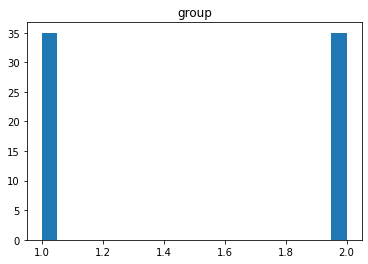

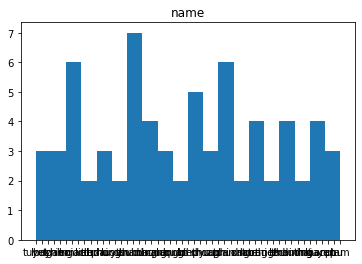

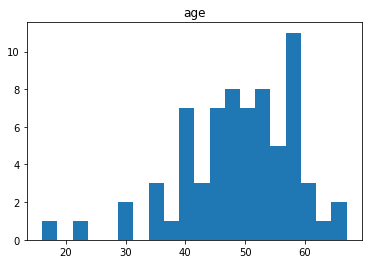

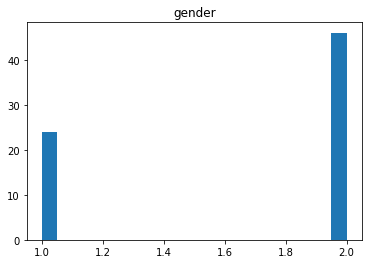

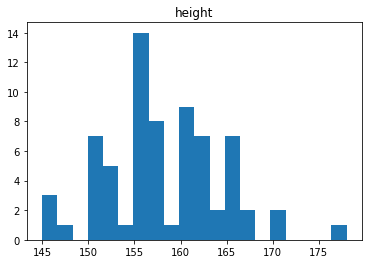

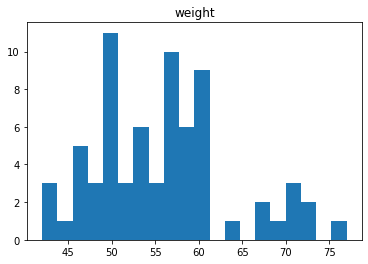

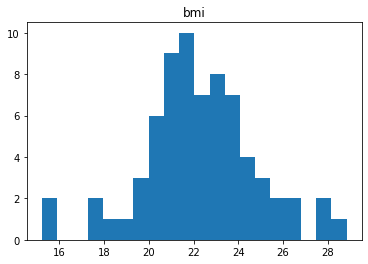

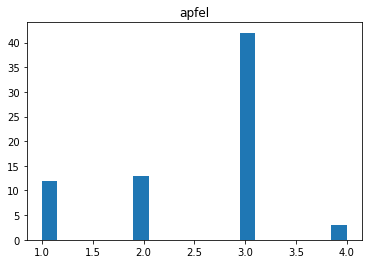

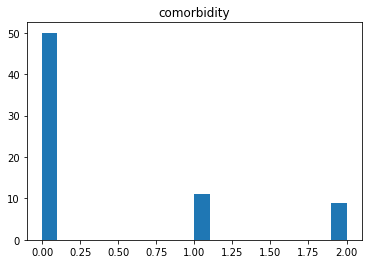

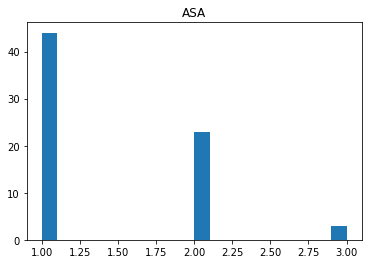

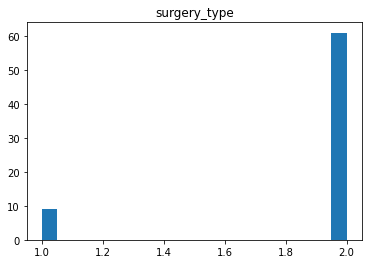

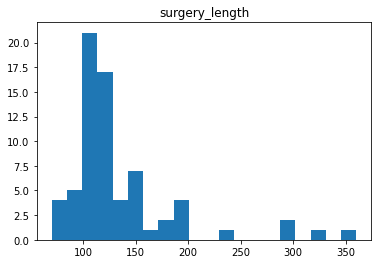

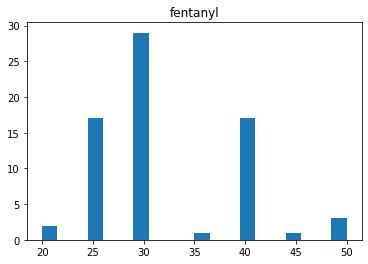

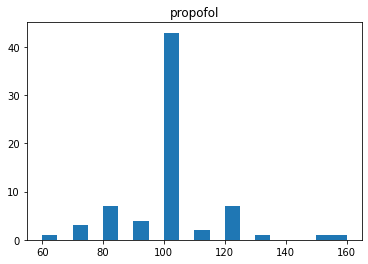

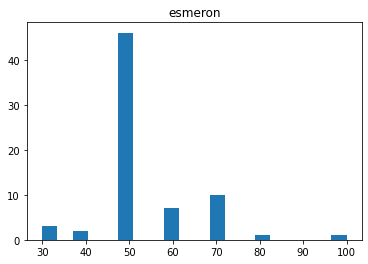

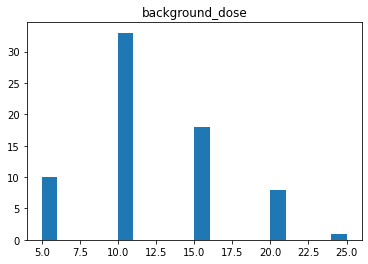

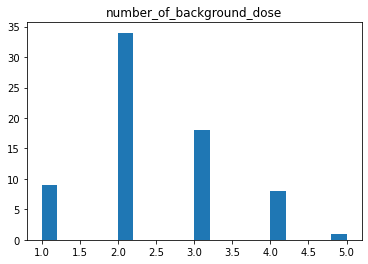

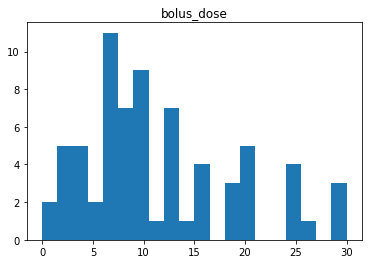

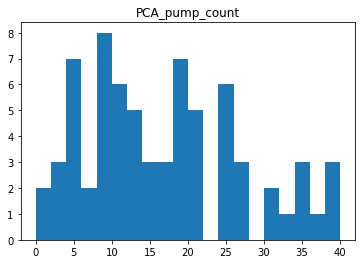

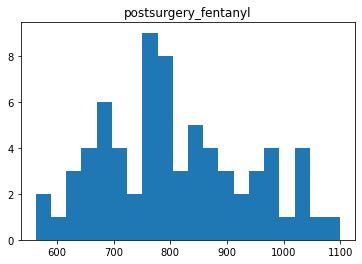

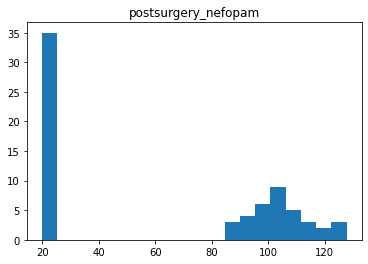

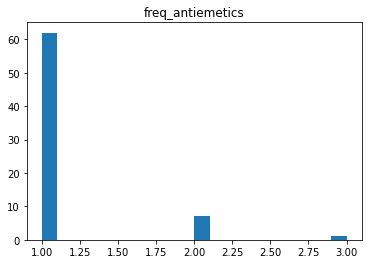

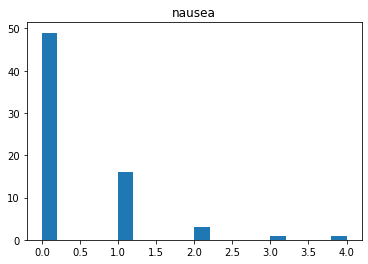

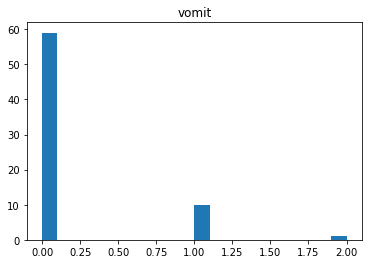

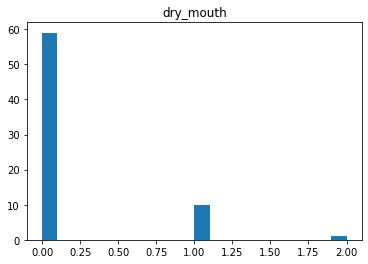

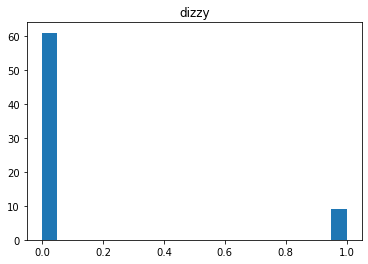

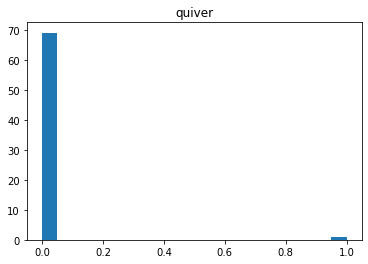

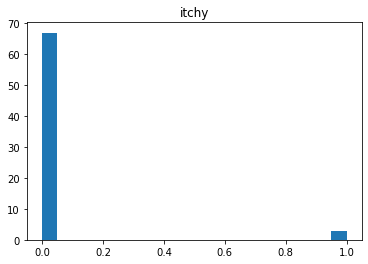

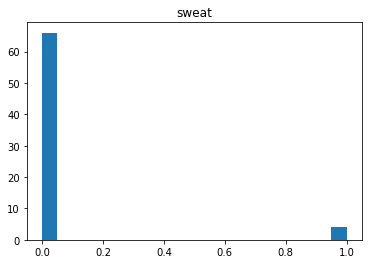

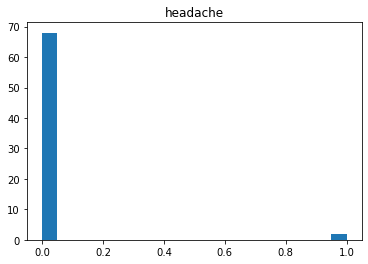

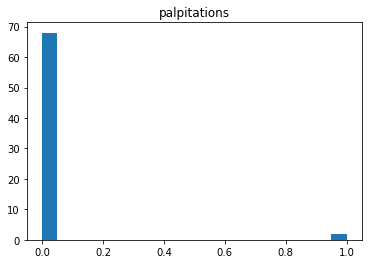

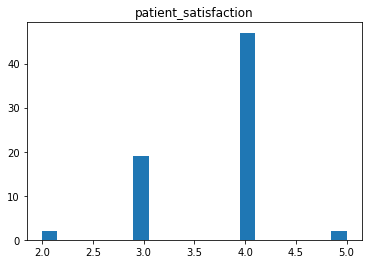

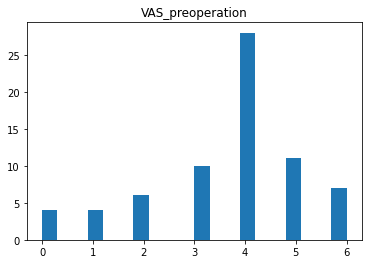

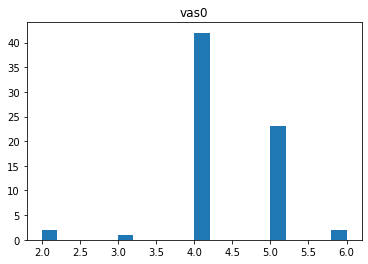

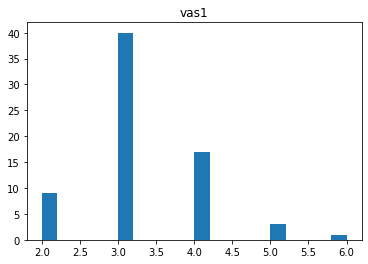

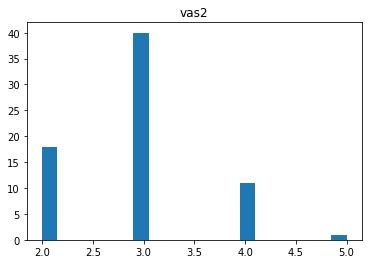

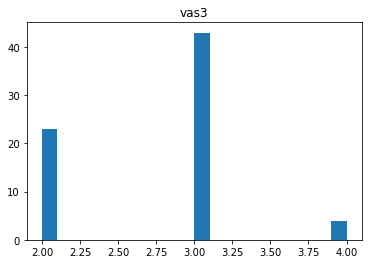

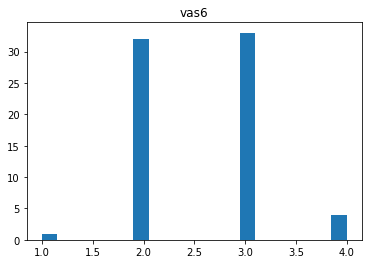

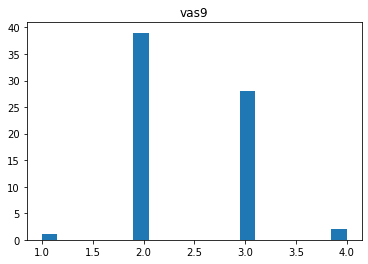

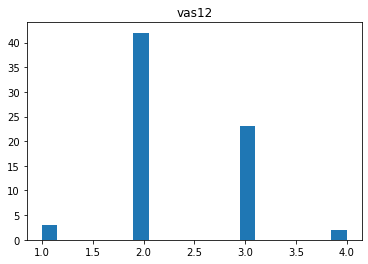

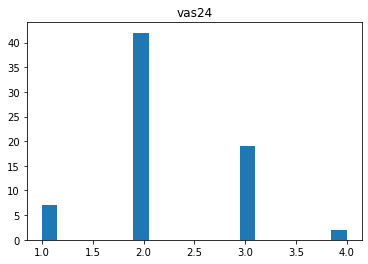

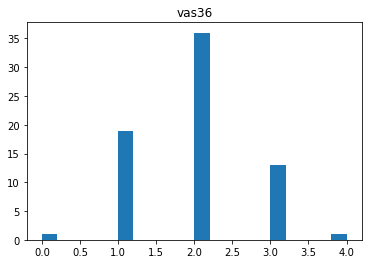

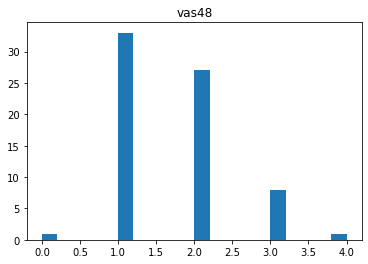

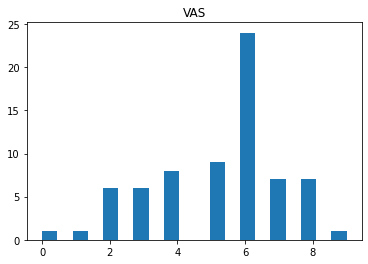

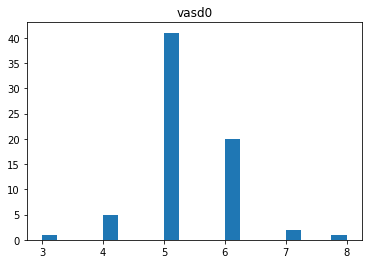

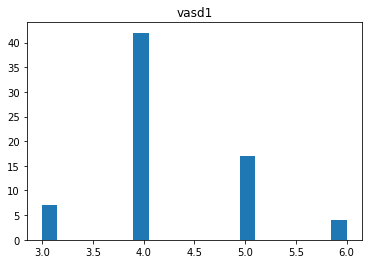

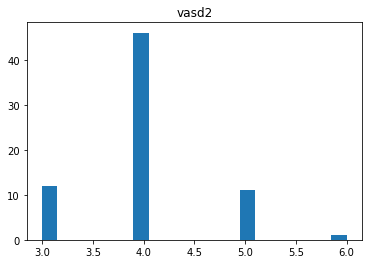

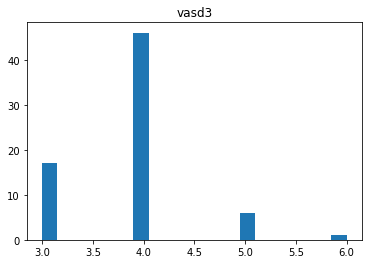

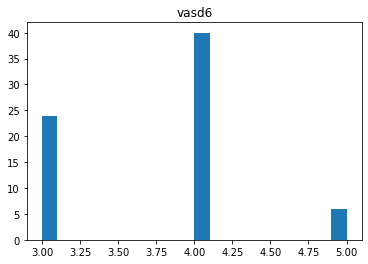

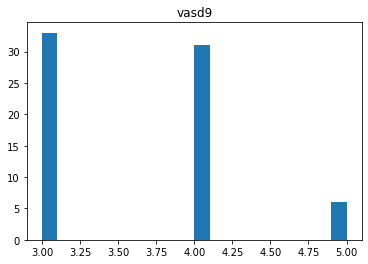

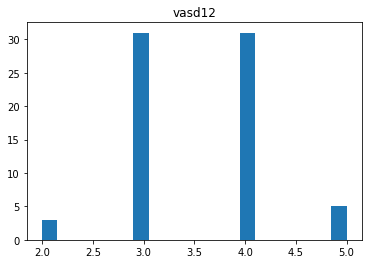

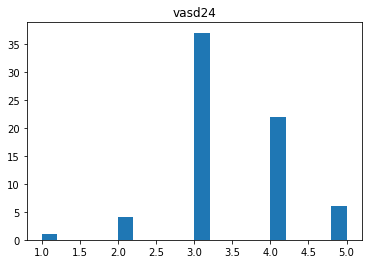

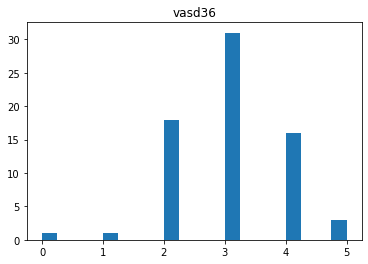

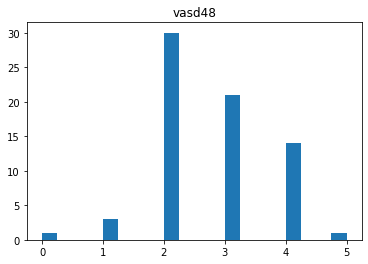

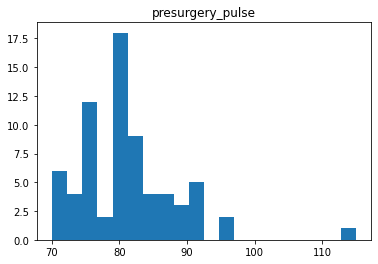

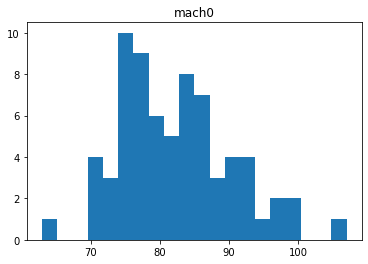

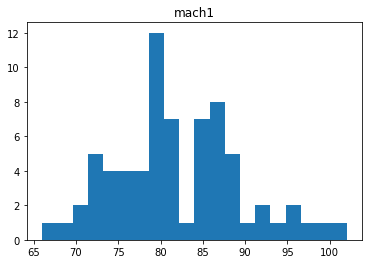

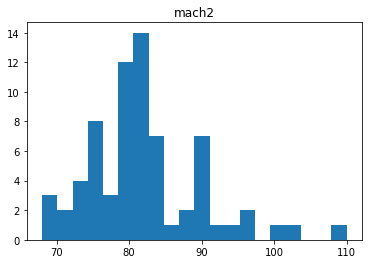

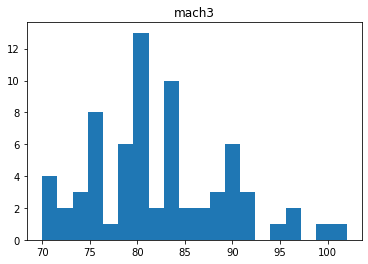

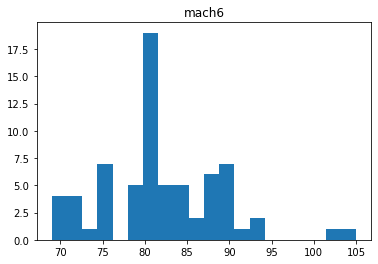

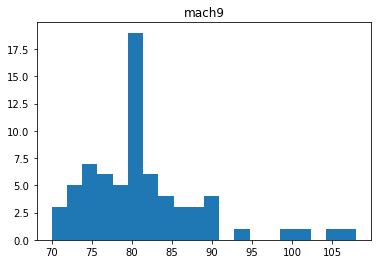

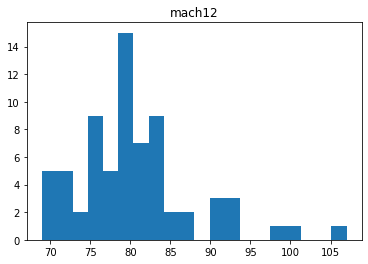

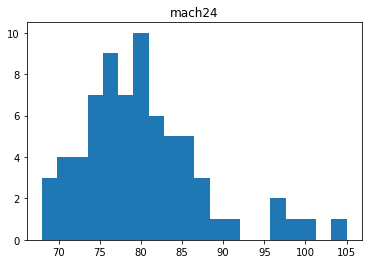

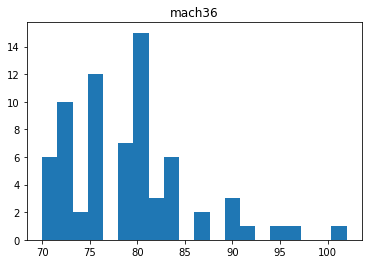

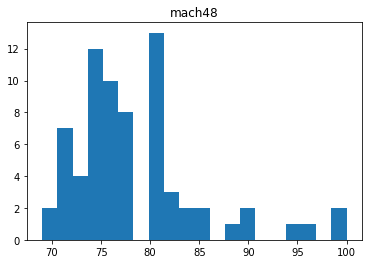

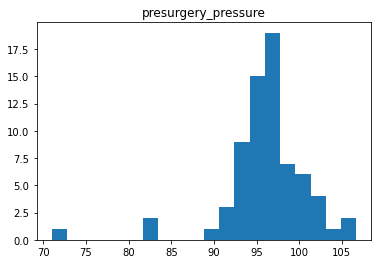

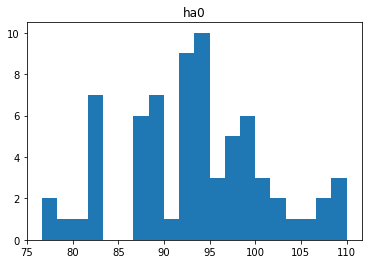

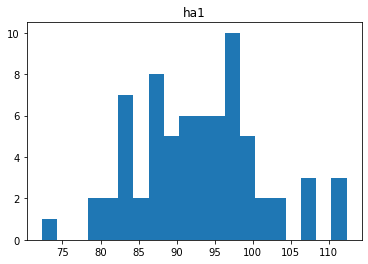

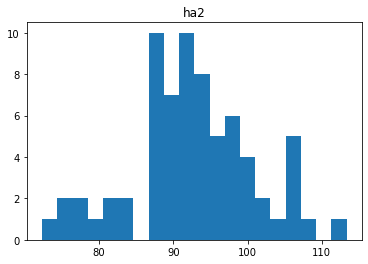

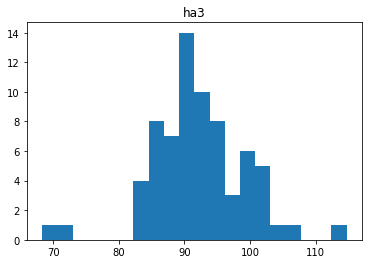

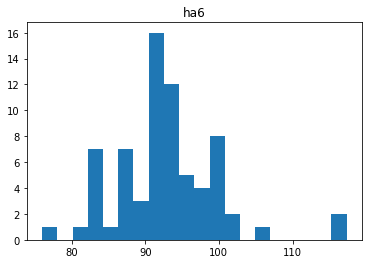

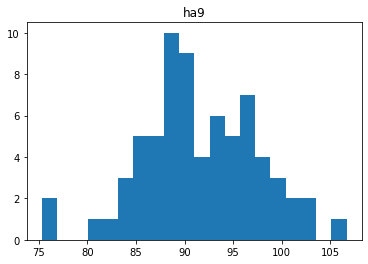

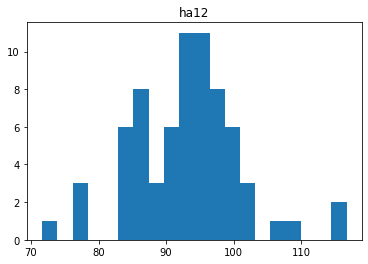

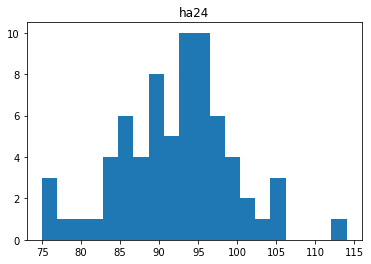

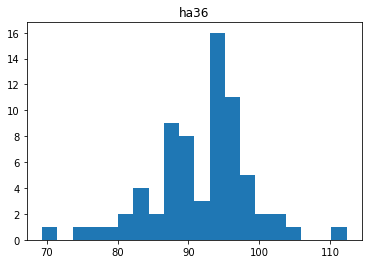

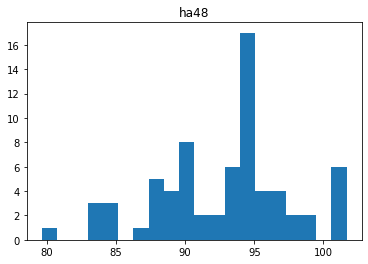

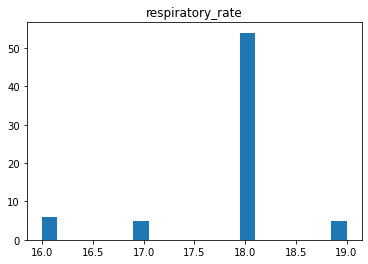

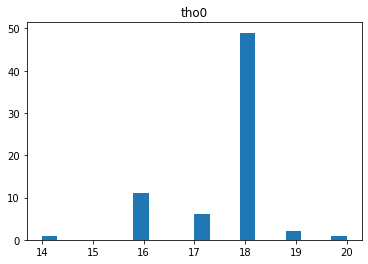

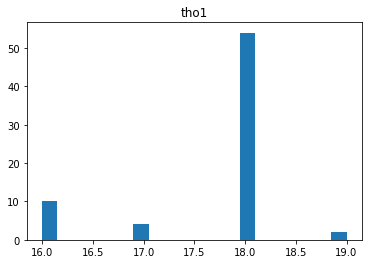

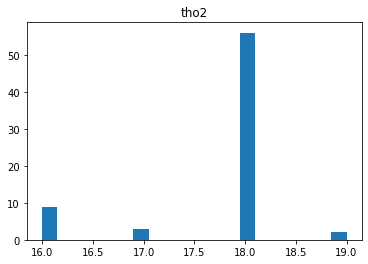

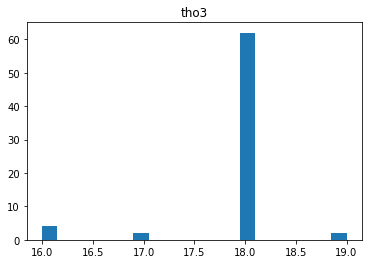

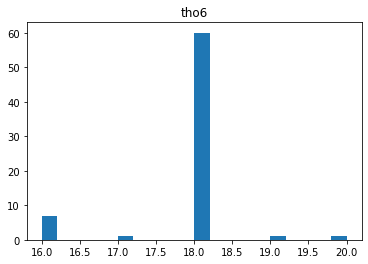

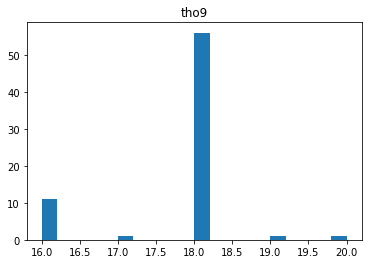

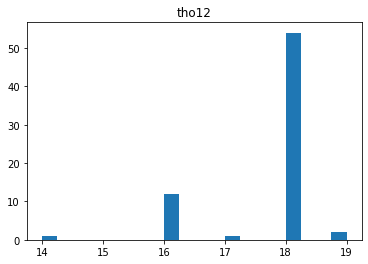

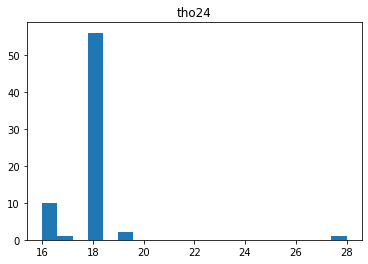

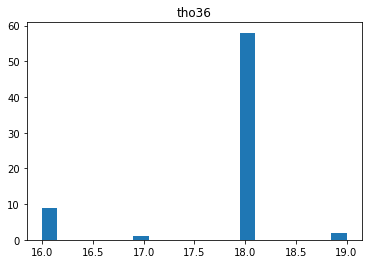

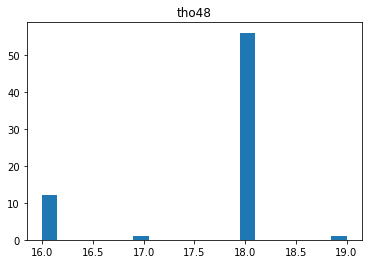

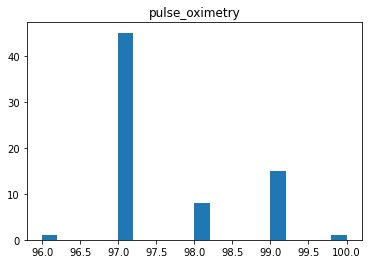

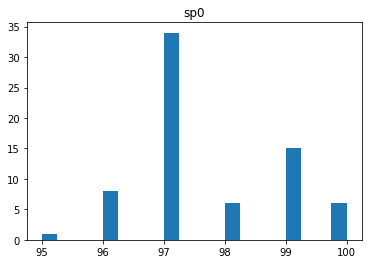

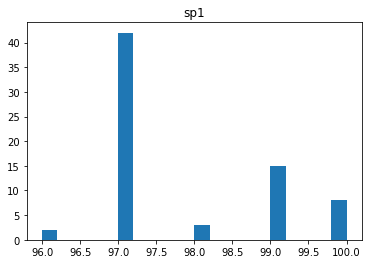

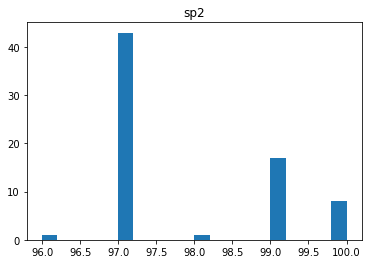

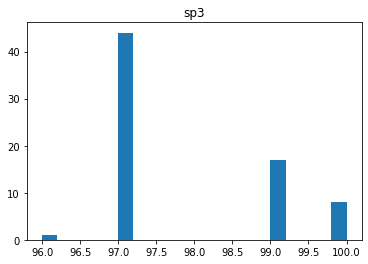

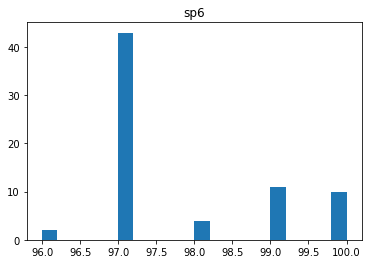

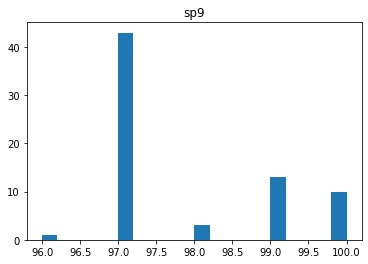

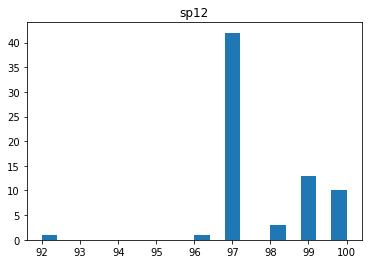

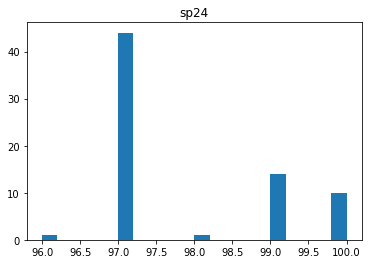

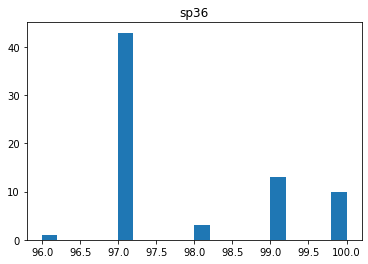

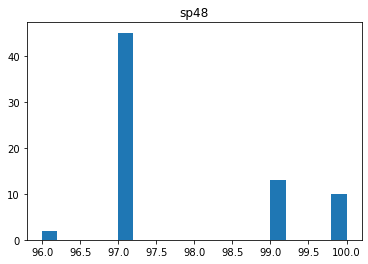

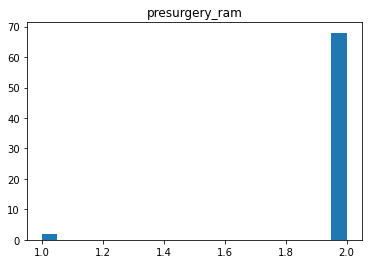

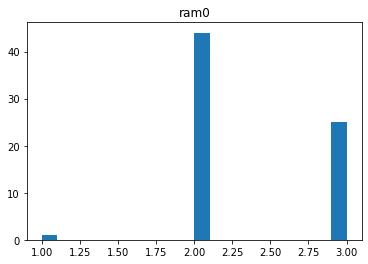

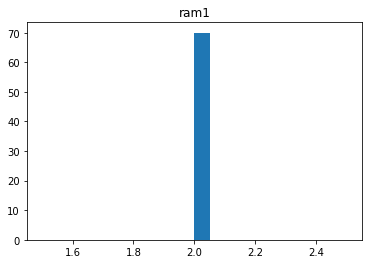

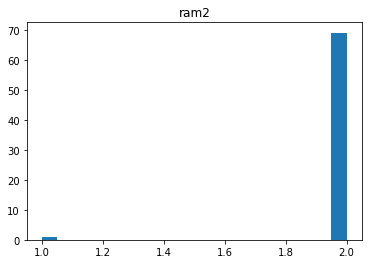

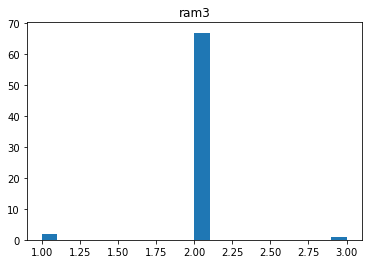

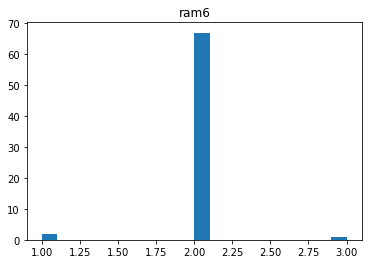

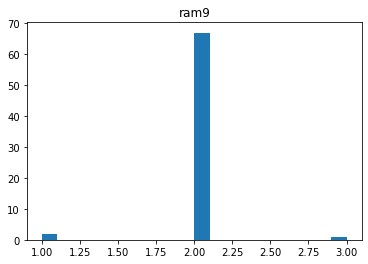

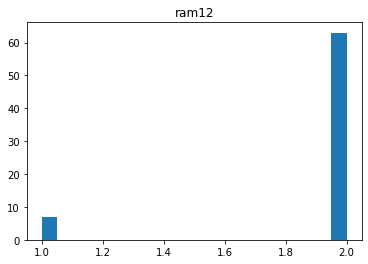

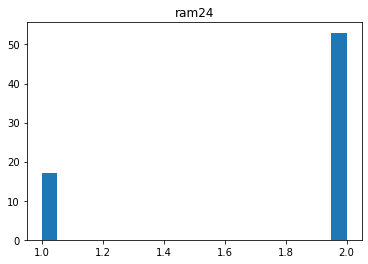

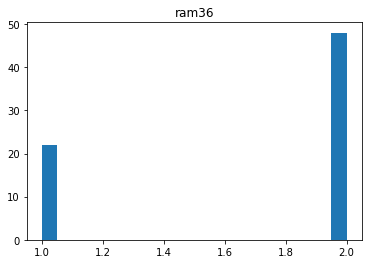

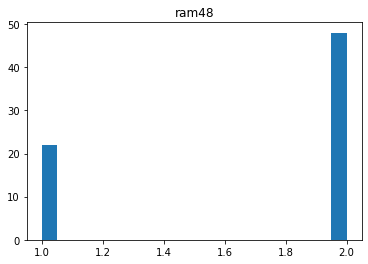

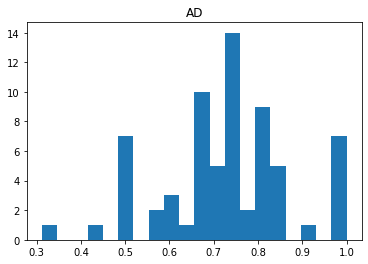

In [25]:
import matplotlib.pyplot as plt
for col in data:
    plt.hist(data[col], bins=20)
    plt.title(col)
    plt.show()

To identify outliers, we will also look at boxplot

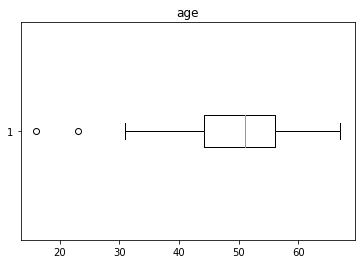

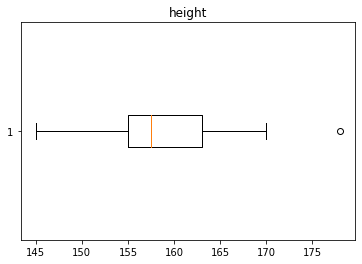

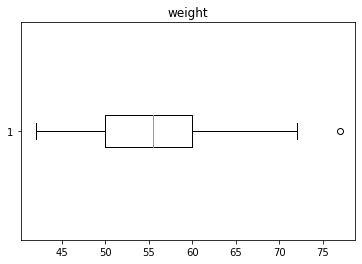

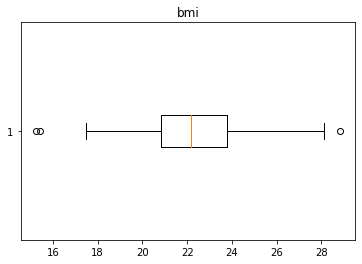

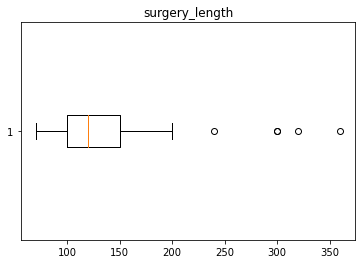

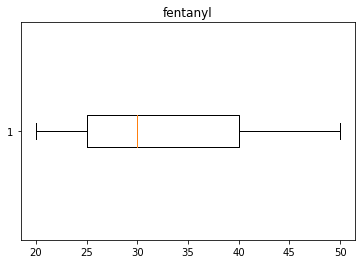

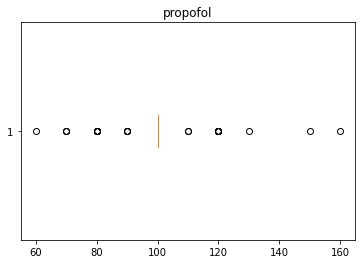

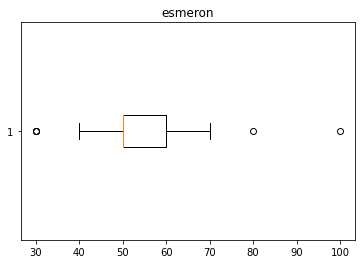

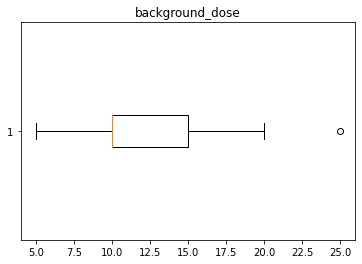

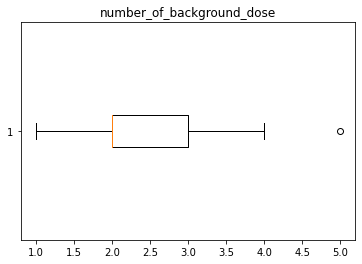

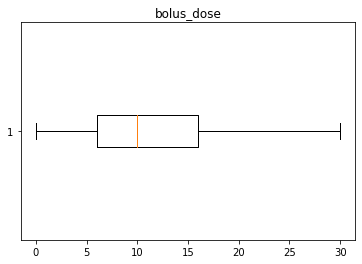

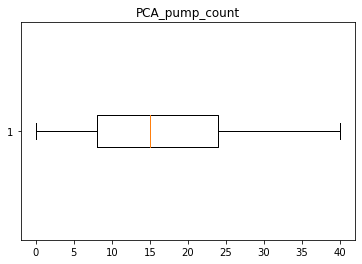

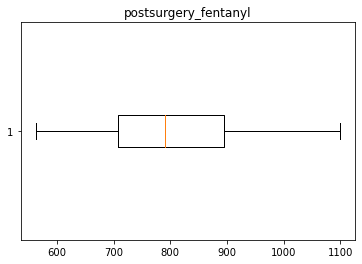

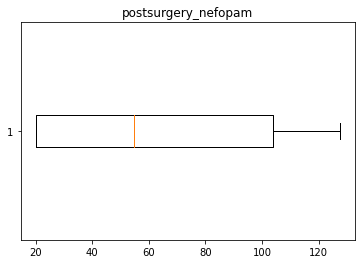

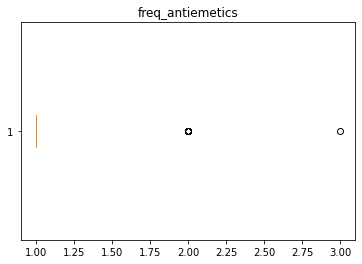

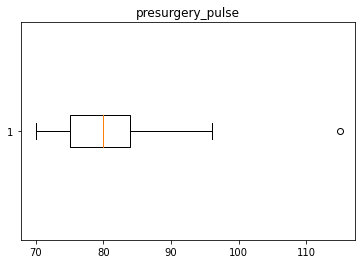

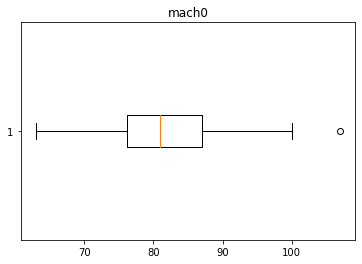

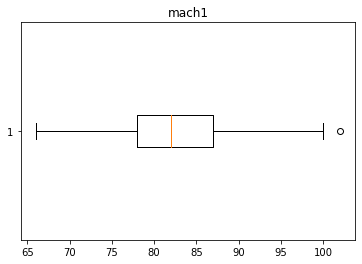

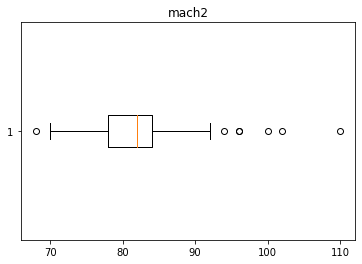

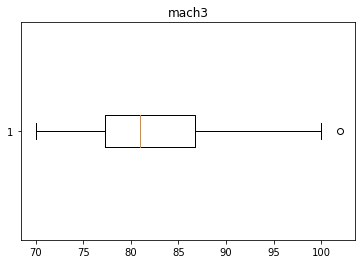

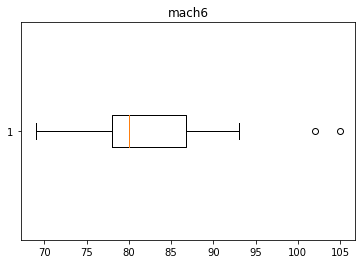

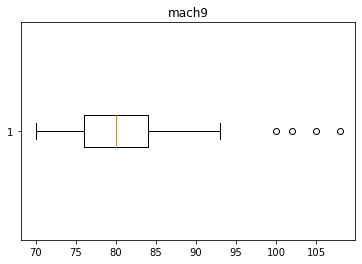

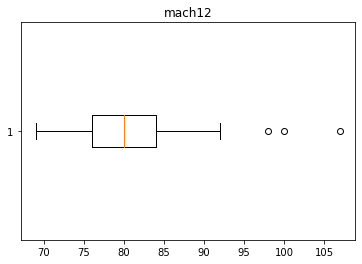

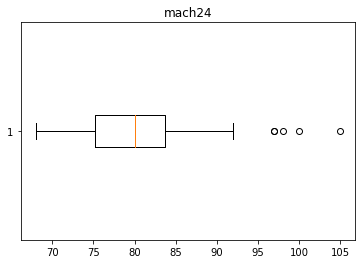

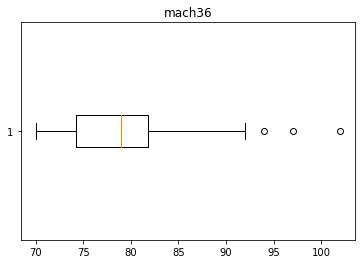

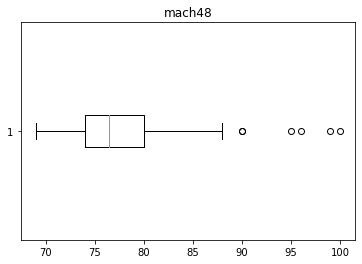

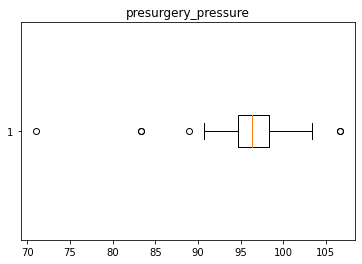

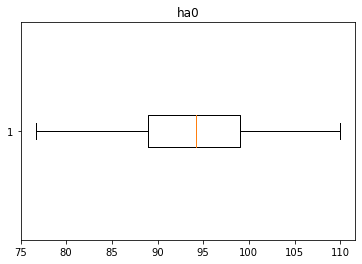

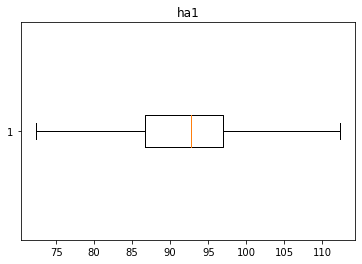

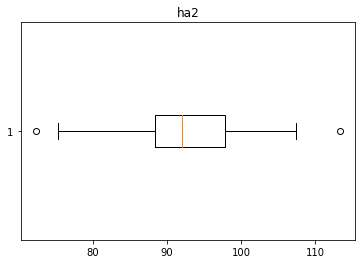

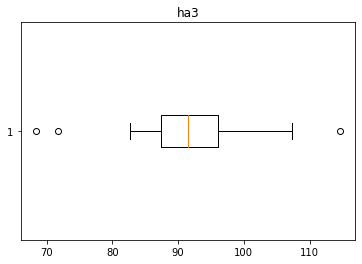

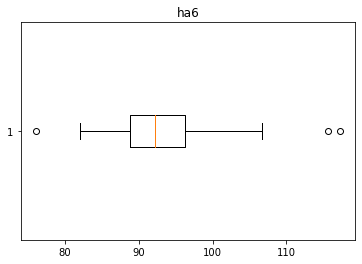

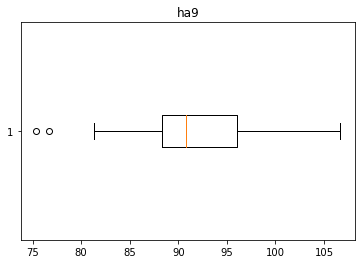

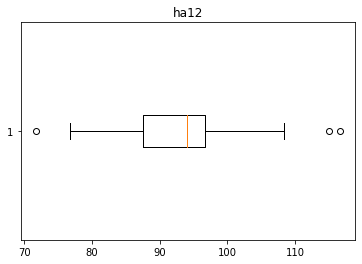

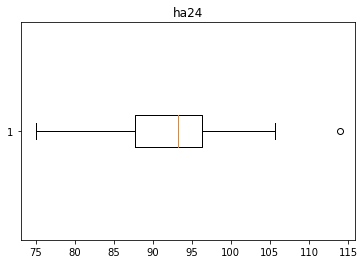

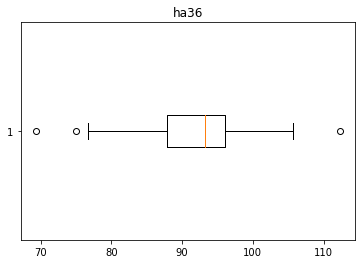

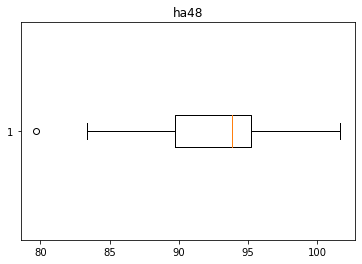

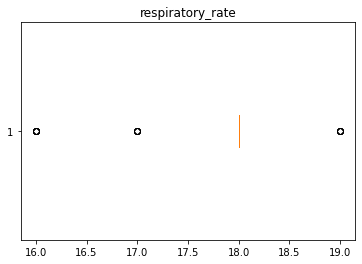

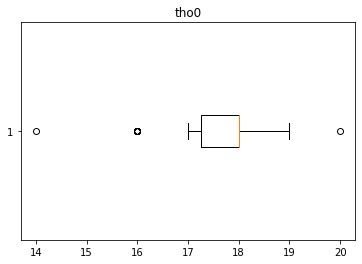

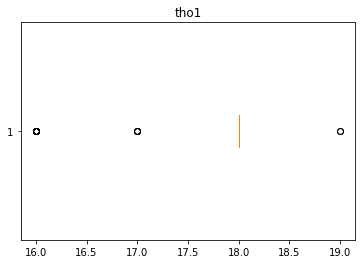

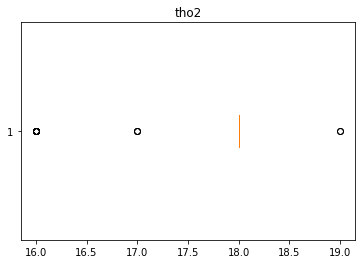

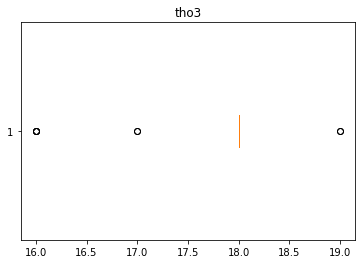

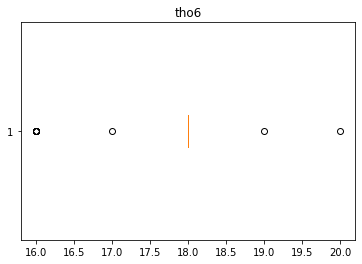

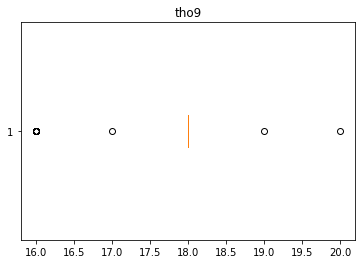

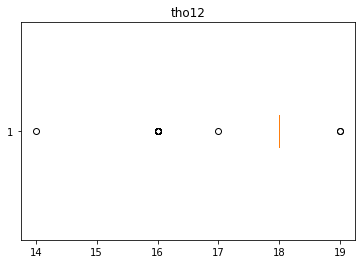

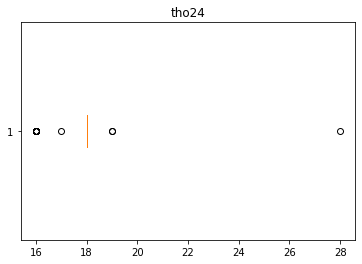

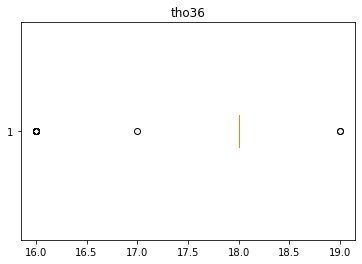

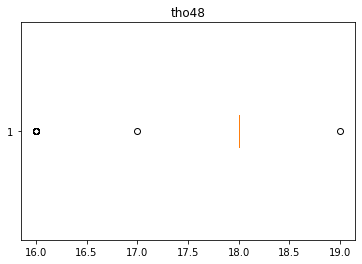

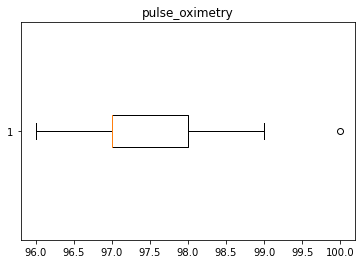

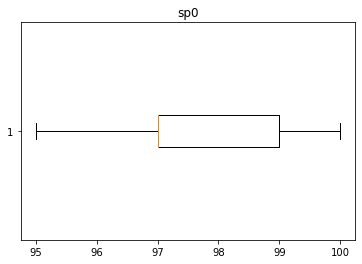

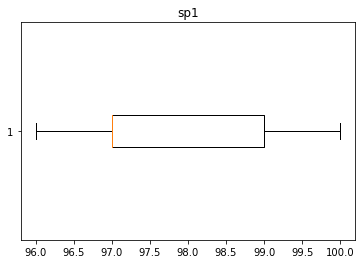

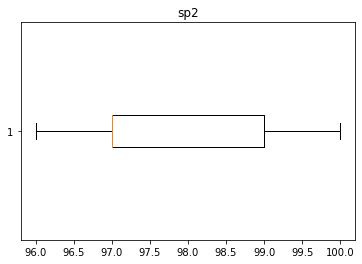

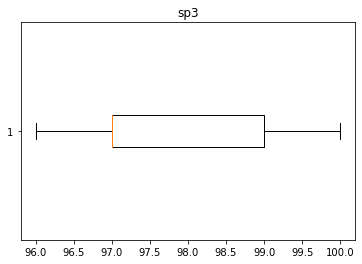

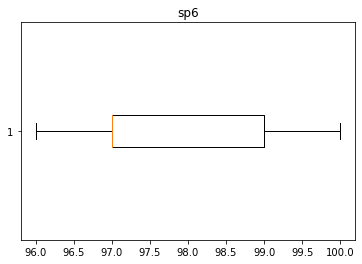

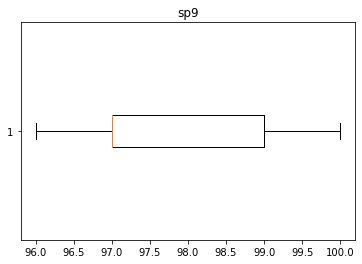

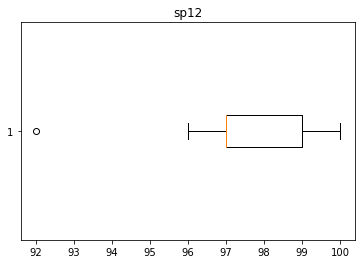

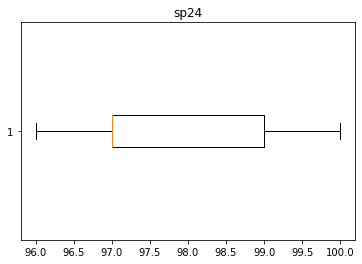

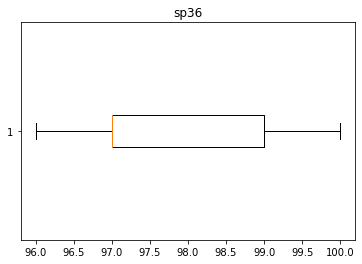

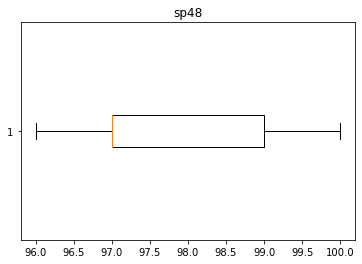

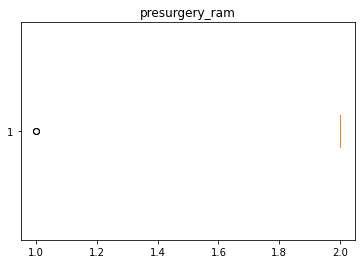

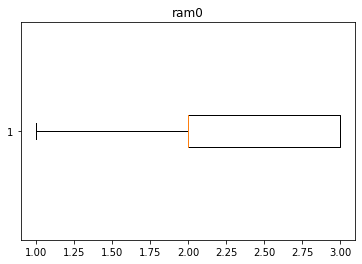

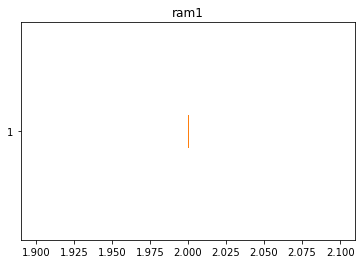

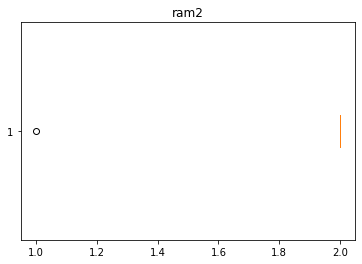

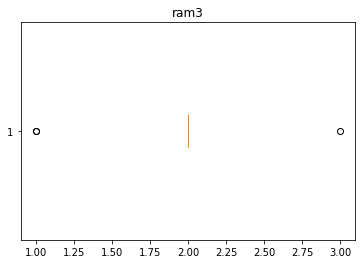

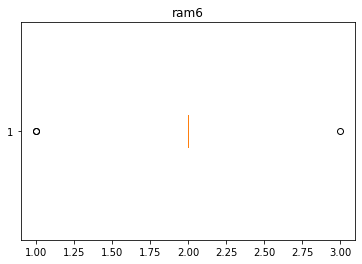

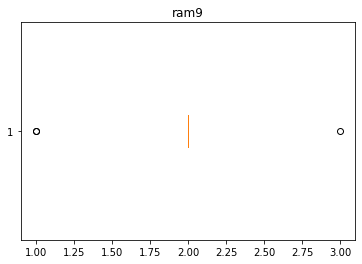

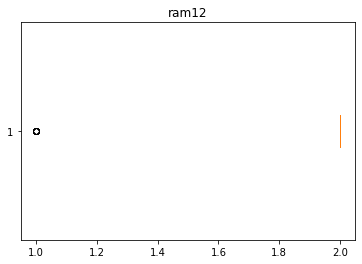

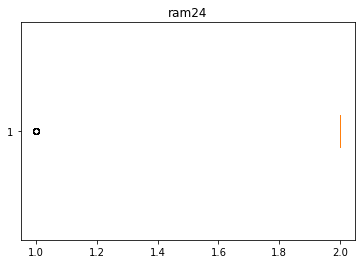

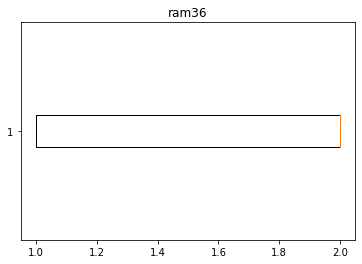

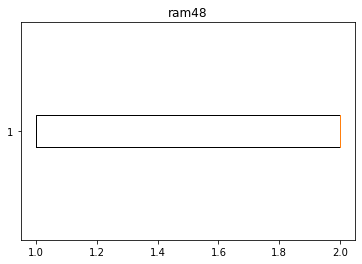

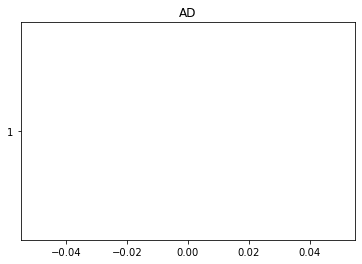

In [26]:
nums = ['age','height','weight','bmi','surgery_length','fentanyl','propofol','esmeron','background_dose','number_of_background_dose','bolus_dose','PCA_pump_count','postsurgery_fentanyl','postsurgery_nefopam','freq_antiemetics','presurgery_pulse','mach0','mach1','mach2','mach3','mach6','mach9','mach12','mach24','mach36','mach48','presurgery_pressure','ha0','ha1','ha2','ha3','ha6','ha9','ha12','ha24','ha36','ha48','respiratory_rate','tho0','tho1','tho2','tho3','tho6','tho9','tho12','tho24','tho36','tho48','pulse_oximetry','sp0','sp1','sp2','sp3','sp6','sp9','sp12','sp24','sp36','sp48','presurgery_ram','ram0','ram1','ram2','ram3','ram6','ram9','ram12','ram24','ram36','ram48','AD']

for i in nums:
    plt.boxplot(data[i], vert= False)
    plt.title(i)
    plt.show()

We can see that there are certain outliers in several variables. However rather than outliers those can be regarded as extreme values instead. 

#### Analyses

Now that we have seen the distribution of the variables we will now proceed with the analyses to answer the objective 1.

We must also be aware of several points: 
* A) According to the study, both groups (F and FN) are similar for demographic characteristic, surgery, and anesthesia. 
* B) Pain scores(VAS) at rest were similar at the time of each examination and under 3.5; 
* C) VAS at exercise was higher in Group FN compared with Group F on the second day of PCA (p<0.05)
* D) Cumulative postoperative fentanyl consumptions at postoperative 48 hours was less than 15.2% in Group FN (631.7 ± 51.5μg) compared with Group F (744.6 ± 84.2μg) with p<0.05 on the second day of PCA (p<0.05)
* E) The A/D ratio in both groups was > 70%, higher in the higher in group FN compared with Group F at 24 hours with p<0.05
* F) The average number of patients requiring bolus dose in the FN group (11.4 ± 7.6) was less than in the Group F (20.8 ± 11.0) with p<0.05
* G) The percentage of satisfied patients was higher in group FN compared with Group F (77.1% and 62.9%, respectively, with p<0.05)


To test the results above, we will need to use several methods to compare the results between Group F and Group FN. The methods we are going to use depends on several conditions. At a glance, we can see the normality assumption from the distribution. However we also need to look a the variance of each numerical group. 

Thus, for A we need to look at the variance of the two groups for age, weight, height, bmi.

#### Separate into Group F and Group FN

In [27]:
data.group.value_counts()

1    35
2    35
Name: group, dtype: int64

We want to see how many samples in each group (this data is used to construct the procedure flowchart above)

In [28]:
data['surgery_type'].value_counts()

2    61
1     9
Name: surgery_type, dtype: int64

The instruction said that we only need to look at the samples with surgery type 2, however it is written that for "Both groups were similar for demographic characteristic, surgery, and anesthesia". Therefore, to ensure that we can cross check the result, we will keep the type of surgery.

In [29]:
groupF = data[data['group'] == 1] 

In [30]:
#check the group1
groupF.head(4)

,group,name,age,gender,height,weight,bmi,apfel,comorbidity,ASA,surgery_type,surgery_length,fentanyl,propofol,esmeron,background_dose,number_of_background_dose,bolus_dose,PCA_pump_count,postsurgery_fentanyl,postsurgery_nefopam,freq_antiemetics,nausea,vomit,dry_mouth,dizzy,quiver,itchy,sweat,headache,palpitations,patient_satisfaction,VAS_preoperation,vas0,vas1,vas2,vas3,vas6,vas9,vas12,vas24,vas36,vas48,VAS,vasd0,vasd1,vasd2,vasd3,vasd6,vasd9,vasd12,vasd24,vasd36,vasd48,presurgery_pulse,mach0,mach1,mach2,mach3,mach6,mach9,mach12,mach24,mach36,mach48,presurgery_pressure,ha0,ha1,ha2,ha3,ha6,ha9,ha12,ha24,ha36,ha48,respiratory_rate,tho0,tho1,tho2,tho3,tho6,tho9,tho12,tho24,tho36,tho48,pulse_oximetry,sp0,sp1,sp2,sp3,sp6,sp9,sp12,sp24,sp36,sp48,presurgery_ram,ram0,ram1,ram2,ram3,ram6,ram9,ram12,ram24,ram36,ram48,AD
0,1,tuyet,41,2,160,67,26.17,3,0.0,1,2,120,25.0,100,50,15.0,3,12,18,780.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.0,4.0,4,3,3,1,1,1,1,1,1,6,6,5,4,4,4,3,2,2,2,2,87,92,87,86,80,84,88,80,68,72,74,95.333333,90.000000,91.670000,95.67,93.330000,91.330000,87.67,71.670000,81.670000,69.330000,95.333333,18,16,16,16,18,18,18,18,18,18,18,100,100,99,98,99,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,0.666667
9,1,tien,50,1,164,64,23.79,1,0.0,1,2,120,40.0,120,50,5.0,1,20,24,970.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5.0,5.0,4,3,3,3,3,3,2,3,3,7,6,5,5,4,4,5,5,4,4,4,82,90,87,82,81,80,79,75,68,70,71,99.333333,106.333333,97.333333,94.00,90.000000,91.333333,91.00,96.666667,88.666667,95.666667,90.000000,18,18,16,16,16,16,18,18,16,18,16,99,99,99,99,99,99,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,0.833333
10,1,thoai,42,2,158,60,24.04,3,0.0,1,2,100,50.0,100,50,5.0,1,30,40,1020.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,6.0,5.0,4,4,3,3,3,3,3,3,3,8,6,5,5,4,4,4,4,5,4,4,89,82,80,76,70,70,71,70,69,79,80,98.333333,90.000000,93.000000,91.00,87.000000,93.000000,90.00,94.666667,90.666667,90.333333,91.666667,18,16,18,18,18,16,16,16,18,16,18,99,99,99,99,99,98,99,99,99,99,99,2,2,2,2,2.0,2,2,2,2,2,2,0.750000
12,1,hong,53,2,155,60,24.97,3,0.0,1,2,120,40.0,100,50,10.0,2,12,18,880.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,6.0,5.0,4,3,3,3,3,3,3,3,3,9,6,5,5,5,5,5,5,4,4,4,87,87,80,76,70,71,70,69,71,72,70,93.000000,95.666667,94.000000,87.00,85.333333,86.666667,86.00,86.666667,89.666667,93.000000,93.000000,18,18,18,16,18,18,18,18,18,16,18,98,99,99,99,99,99,99,99,99,99,99,2,2,2,2,2.0,2,2,2,2,2,2,0.666667


In [31]:
groupFN = data[data['group'] ==2] #treated with more nefopam
groupFN.head(5)

,group,name,age,gender,height,weight,bmi,apfel,comorbidity,ASA,surgery_type,surgery_length,fentanyl,propofol,esmeron,background_dose,number_of_background_dose,bolus_dose,PCA_pump_count,postsurgery_fentanyl,postsurgery_nefopam,freq_antiemetics,nausea,vomit,dry_mouth,dizzy,quiver,itchy,sweat,headache,palpitations,patient_satisfaction,VAS_preoperation,vas0,vas1,vas2,vas3,vas6,vas9,vas12,vas24,vas36,vas48,VAS,vasd0,vasd1,vasd2,vasd3,vasd6,vasd9,vasd12,vasd24,vasd36,vasd48,presurgery_pulse,mach0,mach1,mach2,mach3,mach6,mach9,mach12,mach24,mach36,mach48,presurgery_pressure,ha0,ha1,ha2,ha3,ha6,ha9,ha12,ha24,ha36,ha48,respiratory_rate,tho0,tho1,tho2,tho3,tho6,tho9,tho12,tho24,tho36,tho48,pulse_oximetry,sp0,sp1,sp2,sp3,sp6,sp9,sp12,sp24,sp36,sp48,presurgery_ram,ram0,ram1,ram2,ram3,ram6,ram9,ram12,ram24,ram36,ram48,AD
1,2,long,49,2,157,55,22.310,3,0.0,1,2,100,40.0,100,50,5.0,1,8,8,712.0,105.44,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4.0,4.0,3,2,3,4,3,3,4,3,2,5,6,6,4,4,5,4,4,5,5,3,85,92,87,82,100,102,100,107,100,102,99,100.000000,109.000000,85.666667,89.000000,114.666667,115.666667,106.666667,115.000000,114.000000,112.333333,101.333333,17,16,16,16,18,18,18,16,18,18,18,97,98,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,1.000000
2,2,huynh,60,1,160,58,22.656,1,0.0,2,2,100,40.0,100,30,10.0,2,12,18,780.0,113.60,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,5.0,4.0,3,2,3,2,2,1,2,2,2,7,5,5,4,4,4,3,3,3,4,3,82,80,82,81,80,78,72,74,77,75,76,94.000000,94.000000,83.333333,79.000000,86.666667,91.333333,94.000000,85.000000,75.333333,80.000000,85.000000,18,18,18,18,18,18,18,18,18,18,18,97,99,100,100,100,100,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,0.666667
3,2,toan,67,2,150,56,24.880,3,0.0,1,2,140,30.0,80,50,10.0,2,4,5,744.0,94.88,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1.0,4.0,3,3,3,3,2,2,2,1,1,3,5,4,4,4,4,3,3,3,2,2,80,83,80,88,92,88,80,90,85,84,75,94.666667,93.333333,90.000000,105.000000,102.000000,99.000000,93.333333,101.333333,105.000000,103.333333,96.666667,18,18,18,18,18,18,18,18,18,18,18,97,97,97,97,97,97,97,97,97,97,97,2,2,2,2,2.0,2,2,2,2,2,2,0.800000
4,2,hien,59,2,153,48,20.500,3,1.0,2,2,150,40.0,60,50,15.0,3,12,18,636.0,96.32,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3,4.0,4.0,4,4,3,3,2,2,3,2,2,6,8,5,5,4,4,3,3,4,4,4,76,92,82,96,92,82,84,80,76,72,78,106.666667,99.666667,96.333333,106.666667,100.000000,96.333333,88.333333,94.000000,93.000000,90.666667,94.000000,18,18,18,16,18,16,16,14,16,18,16,98,98,98,99,99,99,100,100,100,100,100,2,2,2,2,2.0,2,2,2,2,2,2,0.666667
5,2,hoi,45,1,165,60,22.030,2,0.0,1,2,120,40.0,120,50,5.0,1,10,20,848.0,118.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4.0,4.0,2,2,2,2,2,2,2,2,2,4,5,4,4,4,3,3,3,3,3,3,87,90,87,80,76,72,74,70,72,71,73,94.000000,100.000000,93.000000,94.000000,95.666667,89.333333,86.666667,87.333333,88.000000,93.000000,79.666667,16,18,18,18,18,18,16,18,18,18,16,98,100,100,100,99,98,99,92,97,99,97,2,2,2,2,2.0,2,2,2,2,2,2,0.500000


### POINT A
Both groups (F and FN) are similar for demographic characteristic, surgery, and anesthesia

#### Normality Test

In [32]:
from scipy.stats import shapiro

def normal(group, nums):
    for i in nums:
        stat, p = shapiro(group[i])
        print(i)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret results
        alpha = 0.05
        if p > alpha:
            
            print('Sample looks Gaussian (fail to reject H0): Normal\n')
        else:
         
            print('Sample does not look Gaussian (reject H0): Not Normal \n')
    return

normal(data,nums)

age
Statistics=0.957, p=0.016
Sample does not look Gaussian (reject H0): Not Normal 

height
Statistics=0.979, p=0.286
Sample looks Gaussian (fail to reject H0): Normal

weight
Statistics=0.954, p=0.012
Sample does not look Gaussian (reject H0): Not Normal 

bmi
Statistics=0.980, p=0.332
Sample looks Gaussian (fail to reject H0): Normal

surgery_length
Statistics=0.742, p=0.000
Sample does not look Gaussian (reject H0): Not Normal 

fentanyl
Statistics=0.860, p=0.000
Sample does not look Gaussian (reject H0): Not Normal 

propofol
Statistics=0.813, p=0.000
Sample does not look Gaussian (reject H0): Not Normal 

esmeron
Statistics=0.755, p=0.000
Sample does not look Gaussian (reject H0): Not Normal 

background_dose
Statistics=0.874, p=0.000
Sample does not look Gaussian (reject H0): Not Normal 

number_of_background_dose
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0): Not Normal 

bolus_dose
Statistics=0.920, p=0.000
Sample does not look Gaussian (reject H0): Not N

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


#### Equal Variance Assumption

We will be using the levene test for the equal variance assumption.
If the p-value is larger than 0.05 it means that it is statistically insignificant and thus we do not have enough evidence to reject the null hypothesis. This means that the variable has a equal variance and vice versa.

In [33]:
from scipy.stats import levene

stat, p = levene(groupF.age,groupFN.age)
print('P-value for equal variance of Age:', p)

stat, p = levene(groupF.height,groupFN.height)
print('P-value for equal variance of Height:', p)

stat, p = levene(groupF.weight,groupFN.weight)
print('P-value for equal variance of Weight:', p)

stat, p = levene(groupF.bmi,groupFN.bmi)
print('P-value for equal variance of BMI:', p)

stat, p = levene(groupF.surgery_length,groupFN.surgery_length)
print('P-value for equal variance of Surgery Length:', p)

stat, p = levene(groupF.fentanyl,groupFN.fentanyl)
print('P-value for equal variance of Fentanyl pre-operation:', p)

stat, p = levene(groupF.propofol,groupFN.propofol)
print('P-value for equal variance of Propofol pre-operation:', p)

stat, p = levene(groupF.esmeron,groupFN.esmeron)
print('P-value for equal variance of Esmeron pre-operation:', p)

P-value for equal variance of Age: 0.37824181393591605
P-value for equal variance of Height: 0.5898197285797389
P-value for equal variance of Weight: 0.10331757512964564
P-value for equal variance of BMI: 0.26863769160110906
P-value for equal variance of Surgery Length: 0.19821290143410528
P-value for equal variance of Fentanyl pre-operation: 0.7401807364463309
P-value for equal variance of Propofol pre-operation: 0.00811501786988276
P-value for equal variance of Esmeron pre-operation: 0.905607421421353


The null hypothesis for this is that all of the variables from the two groups have equal variance. Since the p-value > 0.05, then we can say that it is statistically insignificant. Thus, we do not have enough evidence to reject the null hypothesis. Therefore the variable Age, Height, Weight, and BMI in both group has equal variance.

#### Presurgery treatment

Several things that is important to check is the treatment administered for the preoperation of both groups. 
As we can see from above, the fentanyl and esmeron variable has non-normal distribution with an equal variance. As for propofol variable, we can see that it is not normally distributed and has unequal variance. Therefore, to assess these variables in the two groups we will be using Mann-Whitney U-test.

In [34]:
from scipy.stats import mannwhitneyu

print("P-value of preoperation fentanyl:", mannwhitneyu(groupF.fentanyl, groupFN.fentanyl))
print("P-value of preoperation propofol:", mannwhitneyu(groupF.propofol, groupFN.propofol))
print("P-value of preoperation esmeron:", mannwhitneyu(groupF.esmeron, groupFN.esmeron))

P-value of preoperation fentanyl: MannwhitneyuResult(statistic=442.0, pvalue=0.03533736336989027)
P-value of preoperation propofol: MannwhitneyuResult(statistic=573.5, pvalue=0.605377998208434)
P-value of preoperation esmeron: MannwhitneyuResult(statistic=639.5, pvalue=0.7122745294563773)


From the p-value above we can see that only fentanyl has p-value smaller than 0.05. This indicates that it is statistically significant and we have enough evidence to reject the null hypothesis. In other words, the fentanyl used in both groups are not similar.

Both propofol and esmeron as observed by the p-value shows that both groups are treated similarly.

### Demographics

* The demographics are age, gender, weight, height, bmi.
    * The variables age and weight are skewed and are continuous data, thus we can use the non-parametric methods to test them. For those variables we will be using Mann-Whitney U test.
    * The variables bmi and height are normal thus we can use the ttest.
    * The variable gender is categorical, therefore we will be using chi square test.

* The surgery type and length
    * The variable surgery type is categorical so we will evaluate that using chi square test.
    * The variable surgery length is skewed and can be considered as continuous, so we will have to test using Mann-Whitney U test.
    
* The anasthesia (propofol - esmeron is a muscle relaxant and fentayl is a pain killer)
    * The variable propofol is numerical and roughly follows a normal distribution, so we will be using independent t-test to evaluate.


In [35]:
data.gender.value_counts()

2    46
1    24
Name: gender, dtype: int64

In [36]:
mean_ageF = groupF.age.mean()
genderF = groupF[groupF['gender'] == 2.0]['gender'].count()

proportion_genderF = (genderF/groupF.shape[0])*100
mean_weightF = groupF.weight.mean()
mean_heightF = groupF.height.mean()
mean_bmiF = groupF.bmi.mean()
meansurgery_lengthF = groupF.surgery_length.mean()
type1F = groupF[groupF['surgery_type'] ==1.0]['surgery_type'].count()
proportion_type1F = (type1F/groupF.shape[0])*100

mean_ageFN = groupFN.age.mean()
genderFN = groupFN[groupFN['gender'] == 2.0]['gender'].count()
proportion_genderFN = (genderFN/groupF.shape[0])*100
mean_weightFN = groupFN.weight.mean()
mean_heightFN = groupFN.height.mean()
mean_bmiFN = groupFN.bmi.mean()
meansurgery_lengthFN = groupFN.surgery_length.mean()
type1FN = groupFN[groupFN['surgery_type'] ==1.0]['surgery_type'].count()
proportion_type1FN = (type1FN/groupFN.shape[0])*100

demo = {
    'Group': ['F', 'FN'],
    'Mean Age': [mean_ageF, mean_ageFN],
    'Proportion Female (%)': [proportion_genderF, proportion_genderFN],
    'Mean Weight': [mean_weightF, mean_weightFN],
    'Mean Height': [mean_heightF, mean_heightFN],
    'Mean BMI': [mean_bmiF, mean_bmiFN],
    'Mean Surgery Length (mins)':[meansurgery_lengthF,meansurgery_lengthFN],
    'Proportion Surgery Type 1(%)':[proportion_type1F,proportion_type1FN]
}
demos = pd.DataFrame(demo)
demos

,Group,Mean Age,Proportion Female (%),Mean Weight,Mean Height,Mean BMI,Mean Surgery Length (mins),Proportion Surgery Type 1(%)
0,F,49.371429,71.428571,53.857143,156.285714,22.125429,130.714286,11.428571
1,FN,48.714286,60.000000,57.142857,159.685714,22.381314,136.000000,14.285714


#### Mann Whitney U-test
This non-parametric test is used for non-normal distribution variables

Age, and Weight

In [37]:
#Mann-Whitney Test

mannwhitneyu(groupF.age,groupFN.age)

MannwhitneyuResult(statistic=621.0, pvalue=0.9250345350021689)

In [38]:
mannwhitneyu(groupF.weight,groupFN.weight)

MannwhitneyuResult(statistic=475.0, pvalue=0.10656876113331698)

 Surgery Length

In [39]:
mannwhitneyu(groupF.surgery_length,groupFN.surgery_length)

MannwhitneyuResult(statistic=656.0, pvalue=0.6070274884909326)

As we can see, all of the variables have p-value that are larger than 0.05. 

The null hypothesis for the Mann Whitney U test is that both groups have statistically equal distribution. Since the p-value is large, we do not have enough evidence to reject the null hypothesis. Thus, the distribution of the variables for both groups are equal.

#### Independent T-test
We use t-test for data with normal distribution.

In [40]:
from scipy.stats import ttest_ind
ttest_ind(groupF.height, groupFN.height)

Ttest_indResult(statistic=-2.3007822500429573, pvalue=0.024476481516002846)

We can see that the p-value is smaller than 0.05, which indicates that it is statistically significant. Therefore, we have enough evidence to reject the null hypothesis and claim that there are differences between the mean of the two groups in the height variable.

In [41]:
ttest_ind(groupF.bmi, groupFN.bmi)

Ttest_indResult(statistic=-0.4123585212300265, pvalue=0.6813738130411497)

We can see that the p-value is larger than 0.05, which indicates that it is statistically insignificant. Therefore, we do not have enough evidence to reject the null hypothesis where there is no significant difference in the mean among the bmi for both groups.

#### Chi Square Test
Surgery Type

In [42]:
from scipy.stats import chi2_contingency
FN_2 = groupFN[groupFN.surgery_type == 2]['surgery_type'].count() 
FN_1 = groupFN[groupFN.surgery_type == 1]['surgery_type'].count()
F_2 = groupF[groupF.surgery_type == 2]['surgery_type'].count() 
F_1 = groupF[groupF.surgery_type == 1]['surgery_type'].count()

observed = ([F_1,F_2],[FN_1,FN_2])
stat, p, dof, expected = chi2_contingency(observed)
print('The p-value for the surgery type of two groups are:', p)

The p-value for the surgery type of two groups are: 1.0


The p-value of 1 indicates that we do not have enough statistical evidence to reject the null hypothesis which indicates that the surgery types of both groups does not have significant difference or are similar. 

Gender

In [43]:
FN_Female = groupFN[groupFN.gender == 2]['gender'].count() 
FN_Male = groupFN[groupFN.gender == 1]['gender'].count()
F_Female = groupF[groupF.gender == 2]['gender'].count()
F_Male = groupF[groupF.gender == 1]['gender'].count()

In [44]:
con_table = ([F_Male,F_Female],[FN_Male,FN_Female])
stat, p, dof, expected = chi2_contingency(con_table)
print('The p-value for the gender of two groups are:', p)

The p-value for the gender of two groups are: 0.44999987618560666


Because the p-value is larger than 0.05 we can say that for both gender and surgery type, we do not have enough statistical evidence to reject the null hypothesis which is there is no significant difference between the frequencies of the two groups.

#### Independent T-test
Anasthesia

In [45]:
ttest_ind(groupF.propofol, groupFN.propofol)

Ttest_indResult(statistic=-0.8236686707382229, pvalue=0.41300738308372253)

We can see that the p-value is larger than 0.05, which indicates that it is statistically insignificant. Therefore, we do not have enough evidence to reject the null hypothesis where there is no significant difference in the mean among the anasthesia for both groups.

#### Summary of Point A:

From the result of the comparison we can say that the demographics, surgery, and anasthesia of the patients are indeed similar except for the height. However, as bmi is calculated based on the weight and the height, and the bmi shows a similar distribution, we can conclude that the demographics are similar.

### POINT B

Pain scores(VAS) at rest were similar at the time of each examination and under 3.5

For this point we will be comparing the vas0 of each group.

#### Normality test

In [46]:
shapiro(data.vas0)

ShapiroResult(statistic=0.7542124390602112, pvalue=1.73602565656239e-09)

#### Equal variance test

In [47]:
stat, p = levene(groupF.vas0,groupFN.vas0)
print('P-value for equal variance of VAS0:', p)

P-value for equal variance of VAS0: 0.43445513750842235


The p-value of the normality test shows a very small number < 0.05 which indicates that it is statistically significant, thus we have enough evidence to reject the null hypothesis and claim that the distribution of the variables is not normal.

The p-value of the equal variance shows a large number >0.05 which indicates that we do not have enough statistical evidence to reject the null hypothesis. This means that the variance of vas0 in the two groups have similar variance.

As we can see the score vas0 is an ordinal (rank) data and it has a therefore we will be using the nonparametric test Mann Whitney U-test.

In [48]:
mannwhitneyu(groupF.vas0,groupFN.vas0)

MannwhitneyuResult(statistic=642.5, pvalue=0.6888025299366933)

As we see from the larger than 0.05 p-value, we can say that we do not have enough statistical evidence to reject the null hypothesis. Thus, similar to the findings on the paper we can conclude that the pain score at rest from the two groups are similar.

In [49]:
F_avg0 = groupF.vas0.mean()
FN_avg0 = groupFN.vas0.mean()

print("The average pain score at rest for group F is:", F_avg0)
print("The average pain score at rest for group FN is:", FN_avg0)

The average pain score at rest for group F is: 4.4
The average pain score at rest for group FN is: 4.228571428571429


We are unsure how the researcher acquire the value 3.5, however based on our calculation we can see that the average painscore at rest are similar for both groups. 

### POINT C
VAS at exercise was higher in Group FN compared with Group F on the second day of PCA (p<0.05)

On the second day of PCA refers to the 48th hour. Therefore we will be looking at the vasd48 variables from both groups.

#### Normality Test

In [50]:
shapiro(data.vasd48)

ShapiroResult(statistic=0.8816521763801575, pvalue=7.863045539124869e-06)

#### Equal Variance Test

In [51]:
stat, p = levene(groupF.vasd48,groupFN.vasd48)
print('P-value for equal variance of VASD 48:', p)

P-value for equal variance of VASD 48: 0.7120580585573804


The p-value of the normality test shows a very small number < 0.05 which indicates that it is statistically significant, thus we have enough evidence to reject the null hypothesis and claim that the distribution of the variable is not normal.

The p-value of the equal variance shows a large number >0.05 which indicates that we do not have enough statistical evidence to reject the null hypothesis. This means that variance of vasd48 in the two groups are normally distributed and have similar variance.

As we can see the score vasd48 is a continuous variable therefore we will be using the Mann Whitney U test.

In [52]:
mannwhitneyu(groupF.vasd48,groupFN.vasd48)

MannwhitneyuResult(statistic=703.0, pvalue=0.2614963670815721)

As we see from the larger than 0.05 p-value, we can say that we do not have enough statistical evidence to reject the null hypothesis. Thus, we can say that the VAS at exercise on the 48th hour of the two groups are similar. 

This does not mean that the numbers are different. Therefore we will also look at the difference.

In [53]:
F_vasd48 = groupF.vasd48.mean()
FN_vasd48 = groupFN.vasd48.mean()

print('The average pain score at exercise from group F:', F_vasd48)
print('The average pain score at exercise from group FN:', FN_vasd48)
print('The diference between the average pain score at exercise from group F and FN:', F_vasd48 - FN_vasd48)

The average pain score at exercise from group F: 2.8285714285714287
The average pain score at exercise from group FN: 2.5142857142857142
The diference between the average pain score at exercise from group F and FN: 0.3142857142857145


From the values above we can see that the average pain score at 48 hours is slightly higher in the group F compared to group FN.

We can further analyse the data by comparing the vasd0 and vasd48 of each group to see if there are significant difference between the before and after. To do that, we must use the Wilcoxon test.

In [54]:
from scipy.stats import wilcoxon


print("the p-value for group F of painscore at exercise:", wilcoxon(groupF.vasd0, groupF.vasd48))
print("the p-value for group FN of painscore at exercise:", wilcoxon(groupFN.vasd0, groupFN.vasd48))

the p-value for group F of painscore at exercise: WilcoxonResult(statistic=0.0, pvalue=2.8994252050816714e-07)
the p-value for group FN of painscore at exercise: WilcoxonResult(statistic=0.0, pvalue=2.657286162553741e-07)


We can see that there are significant difference between the 48th hour and the rest period for the pain score during exercise for both groups. This can be seen from the very small p-value which indicates that it is statistically significant, thus we can say that we have enough evidence to reject the null hypothesis and claim that there are significant difference of pain level at exercise on 48th and 0 our for both groups.

Thi significant difference indicates that both drugs are effective in relieving pain.

### POINT D
Cumulative postoperative fentanyl consumptions at postoperative 48 hours was less than 15.2% in Group FN (631.7 ± 51.5μg) compared with Group F (744.6 ± 84.2μg) with p<0.05 on the second day of PCA (p<0.05)

#### Normality test

In [55]:
shapiro(data.vas48)

ShapiroResult(statistic=0.8149988055229187, pvalue=6.124466978008059e-08)

#### Equal variance test

In [56]:
levene(groupF.vas48, groupFN.vas48)

LeveneResult(statistic=0.7028423772609824, pvalue=0.4047675685588029)

In [57]:
levene(groupF.postsurgery_fentanyl, groupFN.postsurgery_fentanyl)

LeveneResult(statistic=1.9820529270361966, pvalue=0.16372956777792624)

For the normality test we can see that the vas48 is significant as it has p-value that is smaller than 0.05. Therefore, we have enough statistical evidence to reject the null hypothesis. Thus, we can say that the variable vas48 has a non normal distribution.

In the equal variance test, both of the p-values are statistically insignificant as they have p-values larger than 0.05. Therefore, we do not have enough evidence to reject the null hypothesis. Thus, we can say that the variables postusrgery_fentanyl and vas48 in both groups have equal variances.

Because the vas48 is not normally distributed, we have to use non-parametric test. Therefore we will be using the Mann Whitney U test. It is important to note that the postsurgery_fentanyl is the total amount of fentanyl used which is equivalent to the 48th hour of administration.

In [58]:
Ff_vas48 = groupF['postsurgery_fentanyl']
FNf_vas48 = groupFN['postsurgery_fentanyl']

mannwhitneyu(Ff_vas48,FNf_vas48)

MannwhitneyuResult(statistic=873.5, pvalue=0.0022118549858988206)

From the p-value we can see that the group has a very small p-value which means that it is statistically significant, thus we can reject the null hypothesis claim that each of the group has the same postsurgery_fentanyl consumption even at the 48th hour post operation and say that the post operative fentanyl consumption for both groups ar enot simlar.

For clarification, we can see it in the values and chart below:

In [59]:
AvgFf_vas48 = Ff_vas48.mean()
AvgFNf_vas48 = FNf_vas48.mean()

print("The average fentanyl consumption on the 48th hour for group F is", AvgFf_vas48)
print("The average fentanyl consumption on the 48th hour for group FN is", AvgFNf_vas48)

The average fentanyl consumption on the 48th hour for group F is 856.0714285714286
The average fentanyl consumption on the 48th hour for group FN is 758.8571428571429


We can see that Group FN consumes significantly lesser total fentanyl.

### POINT E 

#### Assumptions: 
The A/D ratio in both groups was > 70%, higher in the higher in group FN compared with Group F at 24 hours with p<0.05

To see the difference between those two groups, we must first create the variable A/D. Since the A/D is a continuous variable with normal distribution, the vas24 is also a continuous variable and the group is a categorical variable we will once again use ANCOVA.

The normality assumption states that it is normal.

#### Equal variance test

In [60]:
levene(groupF['AD'], groupFN['AD'])

LeveneResult(statistic=nan, pvalue=nan)

For the normality test we can see that the A/D ratio is 

In [61]:
import pingouin as pg

result = pg.ancova(data=data, dv='AD', covar='vas24', between='group')
result

,Source,SS,DF,F,p-unc,np2
0,group,0.000047,1,0.002133,0.963309,0.000033
1,vas24,0.015845,1,0.713534,0.401372,0.010858
2,Residual,1.443411,65,NaN,NaN,NaN


From the p-value we can see that the group has a very high p-value which means that it is statistically insignificant, thus we do have enough evidence to reject the null hypothesis and claim that each of the A/D ratio from both groups at the 24th hour post operation is not similar.

In [63]:
print("Group F A/D:", groupF['AD'].mean())
print("Group FN A/D:", groupFN['AD'].mean())
F_AD = groupF['AD'].mean()
FN_AD = groupFN['AD'].mean()
print("Difference between Group F A/D and Group FN A/D:",F_AD - FN_AD)  

Group F A/D: 0.7241283778468652
Group FN A/D: 0.7275312650312651
Difference between Group F A/D and Group FN A/D: -0.00340288718439985


If we look at the real data it seems that the difference is not by much, however, this small number is indicated to be significant both by the ANCOVA test and the result of the paper.

#### POINT F
Average number of patients requiring bolus dose in the FN group (11.4 ± 7.6) was less than in the Group F (20.8 ± 11.0) with p<0.05. 

It seems that there is a condition applied to number of bolus dose for the average number of patients as all patients required bolus doses. Therefore, we will look at the data and identify the condition.

In [64]:
print('Number of Group F patients taking bolus:', groupF.bolus_dose.value_counts())
print('Number of Group FN patients taking bolus:', groupFN.bolus_dose.value_counts())

Number of Group F patients taking bolus: 20    5
6     5
12    3
30    3
10    3
8     3
25    3
4     2
16    2
5     1
11    1
15    1
18    1
26    1
24    1
Name: bolus_dose, dtype: int64
Number of Group FN patients taking bolus: 6     6
10    5
2     5
8     4
12    3
4     3
18    2
0     2
13    1
5     1
14    1
16    1
9     1
Name: bolus_dose, dtype: int64


#### Equal Variance Test

In [65]:
stat,p = levene(groupF.bolus_dose,groupFN.bolus_dose)
print('P-value for equal variance of average bolus dose above 4:', p)

P-value for equal variance of average bolus dose above 4: 0.0015416043272811987


From the variance test above we can see that the bolus dose has a very small p-value which indicates that we have enough statistical evidence to reject the null hypothesis. We can say that the bolus dose on both groups does not have equal variance. 

Since the data is not normally distributed and is also unequal in variance, we will use Mann Whitney U-test to see the distribution from the two groups.

In [66]:
mannwhitneyu(groupF.bolus_dose,groupFN.bolus_dose)

MannwhitneyuResult(statistic=926.5, pvalue=0.00021753401474085515)

From the result of the test we can see that the p-value is very small (<0.05) thus we can say that it is statistically significant and we have enough evidence to reject the null hypothesis and claim that the distribution of bolus dose on both groups are not similar.

We will also look at the average number of bolus doses because as we know, all of the patients required bolus doses so it wouldn't make sense to compare 35 patients to 35 patients. However, as average aren't arrays of number, we are unable to compare them using the t-test methods, we will simply see the difference.

In [68]:
F_bolnum = groupF['bolus_dose'].mean()
FN_bolnum = groupFN['bolus_dose'].mean()
print('Average number of bolus dose in Group F:',F_bolnum)
print('Average number of bolus dose in Group FN:',FN_bolnum)

Average number of bolus dose in Group F: 14.971428571428572
Average number of bolus dose in Group FN: 7.685714285714286


We can clearly see from the result above that the average patients in Group F requires more bolus dose compared to Group FN.

#### Post surgery bolus: new variable

In [69]:
data['postsurgery_bolus'] = data['postsurgery_fentanyl'] - data['background_dose']
groupF['postsurgery_bolus'] = groupF['postsurgery_fentanyl'] - groupF['background_dose']
groupFN['postsurgery_bolus'] = groupFN['postsurgery_fentanyl'] - groupFN['background_dose']

#check normality
shapiro(data['postsurgery_bolus'])

/var/folders/8y/4hrdj75n3qd5xzkj7p6xb64m0000gn/T/ipykernel_71325/1453656447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupF['postsurgery_bolus'] = groupF['postsurgery_fentanyl'] - groupF['background_dose']
/var/folders/8y/4hrdj75n3qd5xzkj7p6xb64m0000gn/T/ipykernel_71325/1453656447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupFN['postsurgery_bolus'] = groupFN['postsurgery_fentanyl'] - groupFN['background_dose']


ShapiroResult(statistic=0.9790602922439575, pvalue=0.29052141308784485)

#### Equal variance test

In [70]:
stat, p = levene(groupF.postsurgery_bolus,groupFN.postsurgery_bolus)
print('P-value for equal variance of postsurgery bolus:', p)

P-value for equal variance of postsurgery bolus: 0.18851155408167636


We can see from both the normality test and equal variance test that the p-value is larger than 0.05 which indicates that we do not have enough evidence to reject the null hypothesis. Thus, we can claim that the distribution of the bolus volume is normal and that is has equal variance.

Therefore to test this method, we can use the two sample t-test.

In [71]:
ttest_ind(groupF.postsurgery_bolus,groupFN.postsurgery_bolus)

Ttest_indResult(statistic=3.4775968259224923, pvalue=0.0008866602268722336)

The result shows a low p-value (<0.05) which indicates that we have enough statistical evidence to reject the null hypothesis and claim that the amount of bolus dose needed by the patients from both groups is not similar. We can futher verify this by looking at the values.

In [72]:
F_bolus = groupF.postsurgery_bolus.mean()
FN_bolus = groupFN.postsurgery_bolus.mean()
print("The average volume of bolus dose in group F:",F_bolus)
print("The average volume of bolus dose in group FN:",FN_bolus)
print("The difference of average volume of bolus dose in group F and FN:",F_bolus - FN_bolus)

The average volume of bolus dose in group F: 844.9285714285714
The average volume of bolus dose in group FN: 746.1428571428571
The difference of average volume of bolus dose in group F and FN: 98.78571428571433


Thus, we can conclude that the amount of bolus dose needed for patients in group F is more than those in group FN.

### Point G
Percentage of satisfied patients was higher in group FN compared with Group F (77.1% and 62.9%, respectively, with p<0.05)

Satisfaction is an ordinal or rank, group is a categorical variable. Mann Whitney Utest

In [73]:
mannwhitneyu(groupF.patient_satisfaction,groupFN.patient_satisfaction)

MannwhitneyuResult(statistic=505.5, pvalue=0.1285323608292123)

The p-value indicates that it is statistically insignificant. Thus, we do not have enough evidence to reject the null hypothesis. This indicates that the percentage of satisfied patients are similar in Group F and FN.

In [74]:
F_satisfied=groupF[groupF['patient_satisfaction'] >= 4]['patient_satisfaction'].count()
FN_satisfied=groupFN[groupFN['patient_satisfaction'] >= 4]['patient_satisfaction'].count()

In [76]:
Total_satisfied = len(groupF.patient_satisfaction)
Total_satisfiedFN = len(groupFN.patient_satisfaction)

In [77]:
perc_F_satisfaction = F_satisfied/Total_satisfied
perc_FN_satisfaction = FN_satisfied/Total_satisfiedFN

print('Satisfied patient in F group:', perc_F_satisfaction*100,'%')
print('Satisfied patient in FN group:', perc_FN_satisfaction*100,'%')

Satisfied patient in F group: 62.857142857142854 %
Satisfied patient in FN group: 77.14285714285715 %


As we can see here, the percentage of satisfied patients do differ by about 4%. However, through the Mann Whitney U-test we found that the difference is in fact considered insignificant. This indicates that regardless of using Fentanyl or Fentanyl-Nefopam, there are no significant improvement in satisfaction.

### EXTRA ANALYSES:

Although it is not included in the result of the original paper, there are several things that I like to compare between the two groups to further support the summary of this analyses. 

1. Compare the postsurgery fentanyl based on health condition betweeen two groups. The function is to see if the health condition affects the amount of post surgery fentanyl.

2. Compare the postsurgery fentanyl based on the comorbidity between two groups. This function is to see whether the comorbid affects the usage of postsurgery fentanyl.

3. Compare the before and after within each group for vas1 and vas48 within each group to see which experienced more pain. The function of this findings is to see if administering nefopam actually lessened the pain.


#### Post surgery fentanyl and ASA

#### Normality test

In [78]:
shapiro(data.ASA)

ShapiroResult(statistic=0.6718959808349609, pvalue=3.164973144675898e-11)

#### Equal Variance test

In [79]:
stat,p = levene(groupF.ASA, groupFN.ASA)
print('P-value for equal variance of ASA (health condition):', p)

P-value for equal variance of ASA (health condition): 0.02160218950740782


We can see from the normality test and ASA, the p-value are both under 0.05, which indicates that it is statistically significant. Therefore, we have enough evidence to reject the null hypothesis and claim that the health condition has non normal distribution and an unequal variance. Therefore, we will use the Mann Whitney U-test to asses the distributions.

In [80]:
FN_ASA1 = groupFN[groupFN['ASA'] == 1]['postsurgery_fentanyl']
F_ASA1 = groupF[groupF['ASA'] == 1]['postsurgery_fentanyl']
FN_ASA2 = groupFN[groupFN['ASA'] == 2]['postsurgery_fentanyl']
F_ASA2 = groupF[groupF['ASA'] == 2]['postsurgery_fentanyl']
FN_ASA3 = groupFN[groupFN['ASA'] == 3]['postsurgery_fentanyl']
F_ASA3 = groupF[groupF['ASA'] == 3]['postsurgery_fentanyl']


stat,p1 = mannwhitneyu(F_ASA1,FN_ASA1)
stat,p2 = mannwhitneyu(F_ASA2,FN_ASA2)
stat,p3 = mannwhitneyu(F_ASA2,FN_ASA3)

print("The p-value for ASA 1 of both groups:",p1 )
print("The p-value for ASA 2 of both groups:",p2 )
print("The p-value for ASA 2 of both groups:",p3 )

The p-value for ASA 1 of both groups: 0.048861087898252664
The p-value for ASA 2 of both groups: 0.21930264967931878
The p-value for ASA 2 of both groups: 0.09999999999999999


From the test we can see that the p-value is very small for the ASA 1 which indicates that it is statistically significant, thus we have enough evidence to reject the null hypothesis and claim that the post surgery fentanyl consumed for both groups for health condition 1 is not similar.

However, for the health condition or ASA 2, we can see that the p-value is larger than 0.05 which indicates that it is statistically insignificant. Thus we can claim that the post surgery fentanyl consumed in both groups is similar.

As for the health condition or ASA 3, we can see that the p-value is also larger than 0.05, which indicates that it is also statistically insignificant. Thus we can claim that the post surgery fentanyl consumed in both groups is is similar.

In summary, we can see that post surgery consumption is only significantly different in both groups for patients with health condition 1. As there are no further details as to what each categories of health condition means, we are unable to analyse which condition might be significant in influencing the fentanyl usage.

#### Comorbidity and Postsurgery Fentanyl

#### Normality Test

In [81]:
shapiro(data.comorbidity)

ShapiroResult(statistic=0.6050450801849365, pvalue=1.9745038937202253e-12)

#### Equal variance test

In [82]:
levene(groupF.comorbidity, groupFN.comorbidity)

LeveneResult(statistic=0.7013201320132011, pvalue=0.4052742099291595)

Both p-values shows they are statistically insignificant. Therefore we do not have enough evidence to reject the null hypothesis and thus we can say that the comorbidity variable are normally distributed and have equal variance.

Since we know that postoperation fentanyl also has a normal distribution, we are able to use the parametric test.

In [83]:
data.comorbidity.value_counts()

0.0    50
1.0    11
2.0     9
Name: comorbidity, dtype: int64

We can also see that it has three levels, therefore we will use ANOVA to test the variables.

In [92]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model2 = ols('postsurgery_fentanyl ~ C(comorbidity) + C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model2, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(comorbidity),2.0,23166.866825,11583.433413,0.807575,0.450295
C(group),1.0,154112.758069,154112.758069,10.744448,0.001671
Residual,66.0,946669.535820,14343.477815,NaN,NaN


From here we can see that the p-value for comorbidity is larger than 0.05, which means that we do not have enough statistical evidence to reject the null hypothesis. Therefore we can say that there is no statistically significant difference in means between the levels of the comorbidity factor. However, as the p-value on the group variable is lesser than 0.05, we can say that we have enough statistical evidence to reject the null hypothesis and that there is a statistically significant difference in means between the groups. 

This could indicate that comorbidity does not have a significant effect on the response variable.

To identify clearly which specific group has significant difference between each other, we will see the mean of each group in a boxplot and conduct a Tukey Test.

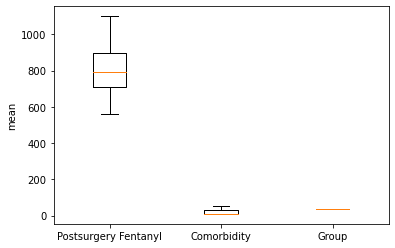

In [98]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([data.postsurgery_fentanyl, data.comorbidity.value_counts(), data.group.value_counts()])
ax.set_xticklabels(["Postsurgery Fentanyl", "Comorbidity", "Group"]) 
ax.set_ylabel("mean") 
plt.show()

In [ ]:
scipy.stats.tukey_hsd

In [103]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(data['postsurgery_fentanyl'], data['comorbidity'])
print(tukey_results)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   0.0    1.0   -17.13 0.9152  -119.446   85.186  False
   0.0    2.0 -54.2411 0.4759 -165.4859  57.0037  False
   1.0    2.0 -37.1111 0.7963 -175.1995 100.9773  False
-------------------------------------------------------


Since all of the p-values are larger than 0.05, we do not have enough statistical evidence to reject the null hypothesis which indicates that the mean of both groups in each level of comorbidity is similar.

In [104]:
tukey_results2 = pairwise_tukeyhsd(data['postsurgery_fentanyl'], data['group'])
print(tukey_results2)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -97.2143 0.001 -153.8489 -40.5797   True
------------------------------------------------------


Since the p-value is smaller than 0.05, we have enough statistical evidence to reject the null hypothesis and claim that the mean difference of both groups are not similar. 

#### Before and After VAS 1 and VAS 48

#### Normality Test

In [ ]:
shapiro(data.vas1)

In [ ]:
shapiro(data.vas48)

Both p-values shows that vas1 and vas48 are statistically significant. Therefore we can reject the null hypothesis and claim that both variables are not normally distributed.

#### Equal Variance Test

In [ ]:
levene(groupF.vas1,groupFN.vas1)

In [ ]:
levene(groupF.vas48, groupFN.vas48)

Both p-values shows that vas1 and vas48 are statistically insignificant. Therefore we do not have enough evidence to reject the null hypothesis. This indicates that our variables have equal variance.

With both conditions, I will be using Willcoxon test to compare the before and after within each group.

In [99]:
F_vas1 = groupF.vas1
F_vas48 = groupF.vas48
FN_vas1 = groupFN.vas1
FN_vas48 = groupFN.vas48

stat, pF = wilcoxon(F_vas1,F_vas48)
stat, pFN = wilcoxon(FN_vas1,FN_vas48)

print("The p-value of group F for vas 1 and vas 48 is:", pF)
print("The p-value of group FN for vas 1 and vas 48 is:", pFN)

The p-value of group F for vas 1 and vas 48 is: 2.0829923529024154e-07
The p-value of group FN for vas 1 and vas 48 is: 3.9999062903612127e-07


From both results we can see that the p-values are very small which indicates that it is statistically significant. Therefore we can say that we have enough evidence to reject the null hypothesis and statest that there is significant difference between the paired samples.

Let us see how much is the difference.

In [100]:
medf1 = F_vas1.median()
medf48 = F_vas48.median()
medfn1 = FN_vas1.median()
medfn48 = FN_vas48.median()

print("Median pain level at 48th hour of group F:",medf48)
print("Median pain level at 48th hour of group FN:",medfn48)
print("Median pain level at 1st hour of group F:",medf1)
print("Median pain level at 1st hour of group F:",medfn1)
print("Difference of pain for group F:", medf1-medf48)
print("Difference of pain for group FN:", medfn1-medfn48)

Median pain level at 48th hour of group F: 2.0
Median pain level at 48th hour of group FN: 1.0
Median pain level at 1st hour of group F: 3.0
Median pain level at 1st hour of group F: 3.0
Difference of pain for group F: 1.0
Difference of pain for group FN: 2.0


To have a better visual we can use a density plot

<AxesSubplot:xlabel='Difference', ylabel='Density'>

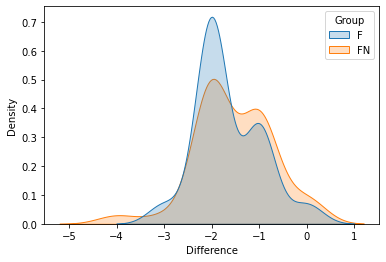

In [101]:
import seaborn as sns
diff_f = F_vas48 - F_vas1
diff_fn = FN_vas48 - FN_vas1

df = pd.DataFrame({'Difference': pd.concat([diff_f, diff_fn]),
                   'Group': ['F'] * len(diff_f) + ['FN'] * len(diff_fn)})

sns.kdeplot(data=df, x='Difference', hue='Group', common_norm=False, fill=True)

#### Conclusion

In conclusion, the group FN shows a significantly lesser fentanyl usage compared to group F. This is portaryed by both the total fentanyl consumption and the bolus dose usage which was triggered by the PCA. Other factors like comorbidity and health conditions of both 2 and 3 have no significant effect on post surgery fentanyl usage. In addition, theh A/D ratio and the pain score at rest on both groups are not significantly different. 

We also find that both drugs are effective in reducing the pain level however nefopam seems to be the more effective drugs judging by the level of pain experience dby the patients.

